####  <span style="color:#5D8BF4"> Irena Vent </span>

# <span style="color:#051367"> Data Mining</span>

<span style="color:#051367"> **Dataset**: Airbnb Madrid</span>

<span style="color:#051367"> **Cluster**: no incluye la muestra mayor de 460 m2 </span>

<span style="color:#051367"> **Cluster method**: complete </span>

Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [1]:
library(tidyverse)

── Attaching packages ──────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
airbnb<-read.csv('data/airbnb-listings.csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

In [3]:
head(airbnb)

,ID,Listing.Url,Scrape.ID,Last.Scraped,Name,Summary,Space,Description,Experiences.Offered,Neighborhood.Overview,⋯,Review.Scores.Communication,Review.Scores.Location,Review.Scores.Value,License,Jurisdiction.Names,Cancellation.Policy,Calculated.host.listings.count,Reviews.per.Month,Geolocation,Features
,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>
1,15141125,https://www.airbnb.com/rooms/15141125,2.017041e+13,2017-04-08,Panoramic charming studio!,"Charming bright and cosy studio in ""El Rastro"" Located in the historic city center in one of the most gastronomic areas of madrid within walking distance to the most important touristic attractions.","It's a bright and cosy studio located in the heart of ""El Rastro"", one of the most central and charming areas of Madrid. The studio has a panoramic stunning view. It's equipped with a comfy double bed, a folding single bed, tv, dvd, all the kitchen facilities, as well as a well appointed bathroom.","Charming bright and cosy studio in ""El Rastro"" Located in the historic city center in one of the most gastronomic areas of madrid within walking distance to the most important touristic attractions. It's a bright and cosy studio located in the heart of ""El Rastro"", one of the most central and charming areas of Madrid. The studio has a panoramic stunning view. It's equipped with a comfy double bed, a folding single bed, tv, dvd, all the kitchen facilities, as well as a well appointed bathroom. The full studio will be entirely to the guests. The building has a lift so you don't have to carry your luggage any more :) I am delighted to preform the check in at the apartment upon an agreed time, and explain all the apartment details and give you a local insight about Madrid :) During the stay I am always available to assist in anything you may require :) You can always contact via whattsapp, phone and airbnb. The studio is located in the remarkable neighbourhood of La latina, Madrid city ce",none,"The studio is located in the remarkable neighbourhood of La latina, Madrid city center, in the heart of El Rastro street market that happens every Sunday and bank holidays. If you are in Madrid you should not miss this event!",⋯,10,10,10,,,moderate,2,5.11,"40.40745268477803,-3.7079954754432634","Host Is Superhost,Host Has Profile Pic,Host Identity Verified,Requires License,Instant Bookable"
2,9470166,https://www.airbnb.com/rooms/9470166,2.017041e+13,2017-04-08,Comfortable penthouse in the center,"In the center, recently remodeled, comfortable, modern, very bright, very quiet and fully equipped. 10min walk to Plaza Mayor, Thyssen Museum, Atocha train station and 15 to the Prado Museum. Metro 2min away.Great bed, Wifi,stereo,flat TV..",Quiet and comfortable space where you can relax during your stay in out city,"In the center, recently remodeled, comfortable, modern, very bright, very quiet and fully equipped. 10min walk to Plaza Mayor, Thyssen Museum, Atocha train station and 15 to the Prado Museum. Metro 2min away.Great bed, Wifi,stereo,flat TV.. Quiet and comfortable space where you can relax during your stay in out city You will be alone, while you are in my flat and you can use everything you have there If you have any questions while you are in the flat or any suggestions just tell me I will always help you! It belongs to the district center of Madrid where you can find several museums , ancient Jewish of Madrid, and taverns where you can have quiet drinks The nearest Metro station is Tirso de Molina , its just 300m from my flat The Puerta del Sol and Plaza Mayor are just 10 minutes walking The apartment is very central and can move to any part of the downtown walking.",none,"It belongs to the district center of Madrid where you can find several museums , ancient Jewish of Madrid, and taverns where you can have quiet drinks",⋯,9,9,8,,,strict,13,5.88,"40.40831556101927,-3.705006385704201","Host Has Profile Pic,Host Ident

In [4]:
dim(airbnb)

[1] 14780    89

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [5]:
airbnb_filtered <- airbnb[ ,c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')]

In [6]:
dim(airbnb_filtered)

[1] 14780    14

Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [7]:
airbnb_filtered_mad <- subset(airbnb_filtered, City=='Madrid' & Room.Type=="Entire home/apt" & Neighbourhood != "")

In [8]:
dim(airbnb_filtered_mad)

[1] 5601   14

In [9]:
df_madrid <- subset(airbnb_filtered_mad, select = -c(Room.Type, City))

In [10]:
dim(df_madrid)

[1] 5601   12

Crea una nueva columna llamada Square.Meters a partir de Square.Feet. Recuerda que un pie cuadrado son 0.092903 metros cuadrados.

In [11]:
df_madrid$Square.Meters <- df_madrid$Square.Feet*0.092903

In [12]:
dim(df_madrid)

[1] 5601   13

In [13]:
colnames(df_madrid)

[1] "Neighbourhood"        "Accommodates"         "Bathrooms"           
 [4] "Bedrooms"             "Beds"                 "Price"               
 [7] "Square.Feet"          "Guests.Included"      "Extra.People"        
[10] "Review.Scores.Rating" "Latitude"             "Longitude"           
[13] "Square.Meters"

¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [14]:
nrow(df_madrid[is.na(df_madrid$Square.Meters),])

[1] 5254

In [15]:
paste(round((nrow(df_madrid[is.na(df_madrid$Square.Meters),])/nrow(df_madrid)), 2)*100,
      "% de los apartamentos no muestran los metros cuadrados")

[1] "94 % de los apartamentos no muestran los metros cuadrados"

De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [16]:
nrow(df_madrid[!is.na(df_madrid$Square.Meters),])

[1] 347

In [17]:
table(df_madrid$Square.Meters == 0)


FALSE  TRUE 
  219   128 

Reemplazar todos los 0m^2 por NA 

In [18]:
df_madrid$Square.Meters[df_madrid$Square.Meters == 0] <- NA

In [19]:
nrow(df_madrid[!is.na(df_madrid$Square.Meters),])

[1] 219

In [20]:
nrow(df_madrid[is.na(df_madrid$Square.Meters),])

[1] 5382

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA. Pero **antes de crear el modelo** vamos a hacer:
* pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.
* crearemos una variable sintética nueva basada en la similitud entre barrios que usaremos en nuestro modelo.

Pinta el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más

Warning message:
“Use of `df_madrid$Square.Meters` is discouraged. Use `Square.Meters` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 5382 rows containing non-finite values (stat_bin).”


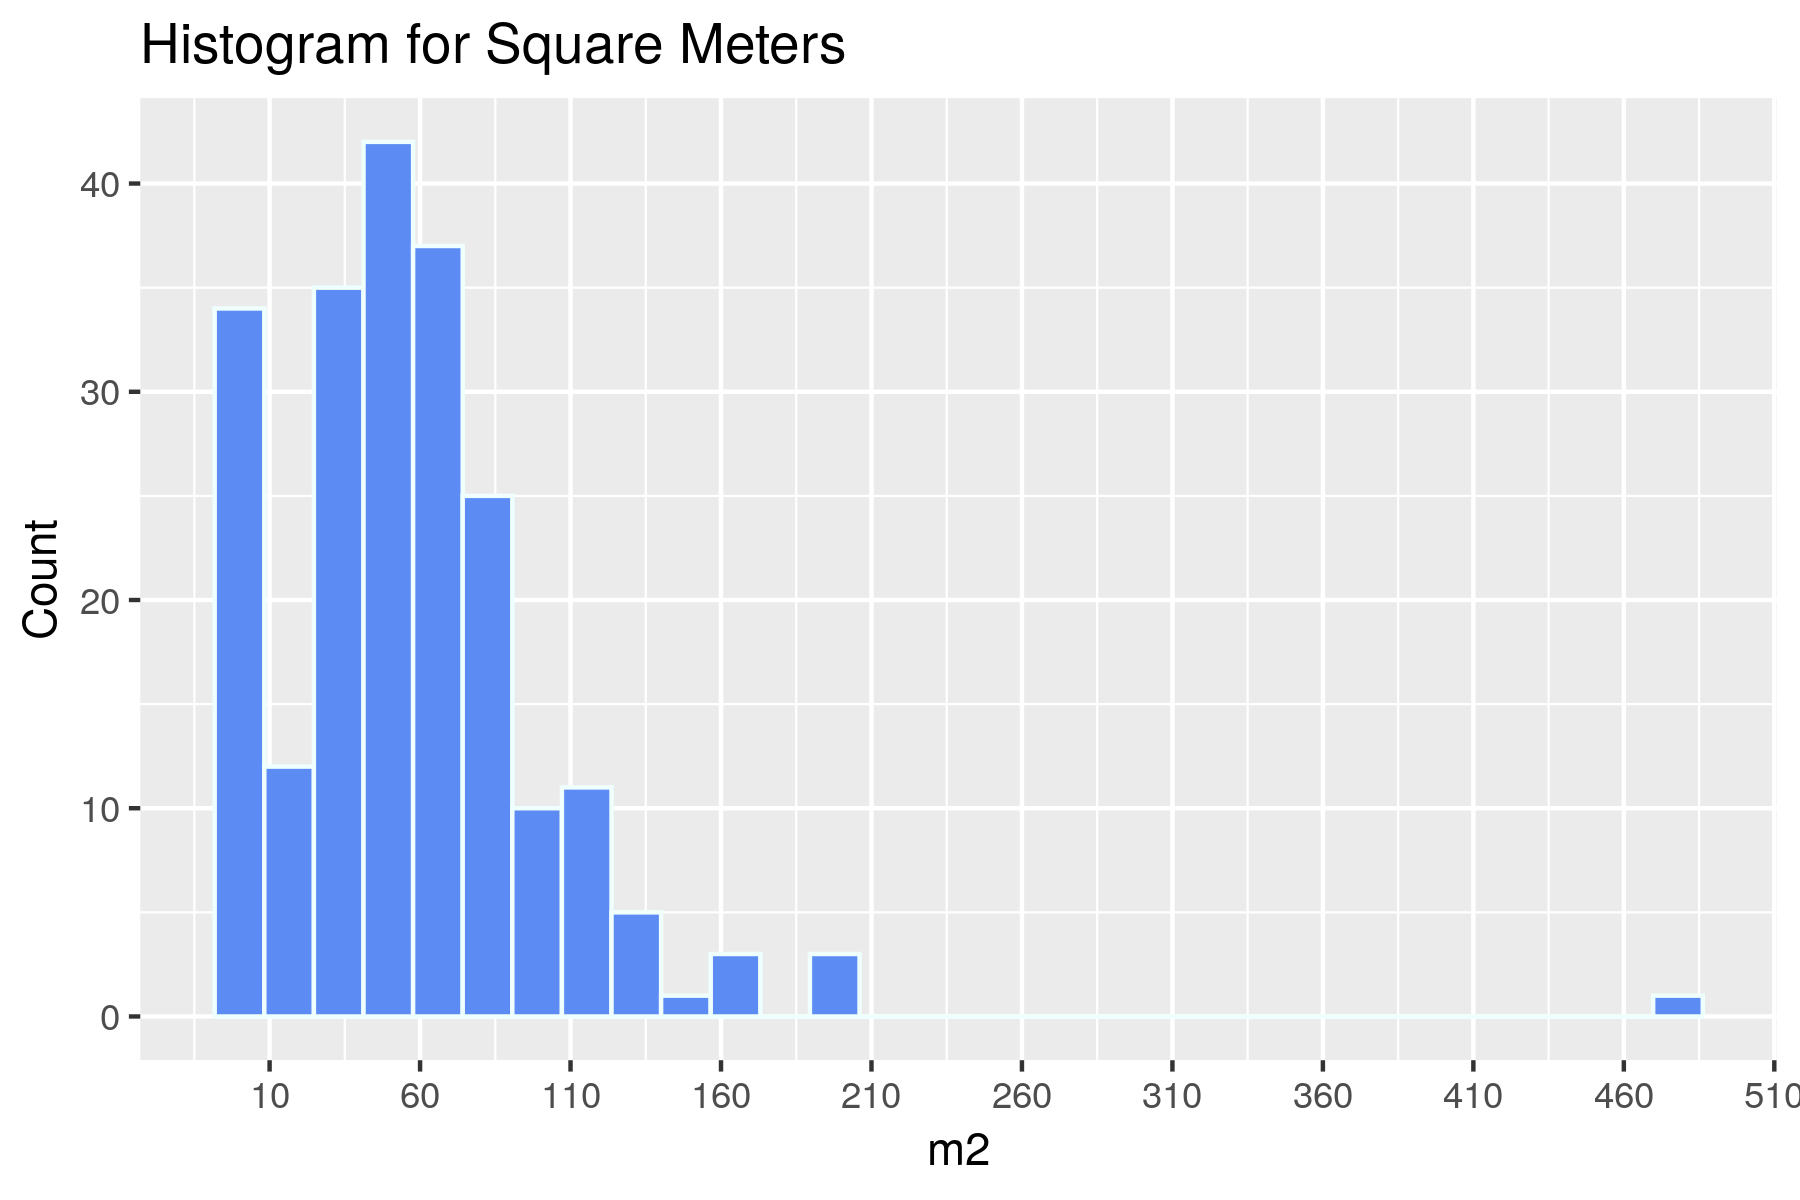

In [21]:
ggplot(data = df_madrid, aes(x = df_madrid$Square.Meters)) +
    geom_histogram(color = '#EFFFFD', fill='#5D8BF4') + 
    labs(title="Histogram for Square Meters", x="m2", y="Count") +
    scale_x_continuous(breaks = seq(10, 550, by=50))

<span style="color:#5D8BF4">Podemos ver que exiten pisos con menos de 10 m2, por lo que tratándose de pisos de alquiler de tipo **completo** puede tratarse de un error. Observamos también que hay una sóla muestra con más de 460m2. Estos valores pueden sesgar la los resultados de los estudios posteriores, al no tener suficientes muestras, por lo que decidimos eliminar la muestra para los posteriores análisis.</span>

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [22]:
df_madrid$Square.Meters[df_madrid$Square.Meters < 20] <- NA

In [23]:
df_madrid <- df_madrid[-c(5158), ]

In [24]:
nrow(df_madrid)

[1] 5600

Warning message:
“Use of `df_madrid$Square.Meters` is discouraged. Use `Square.Meters` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 5427 rows containing non-finite values (stat_bin).”


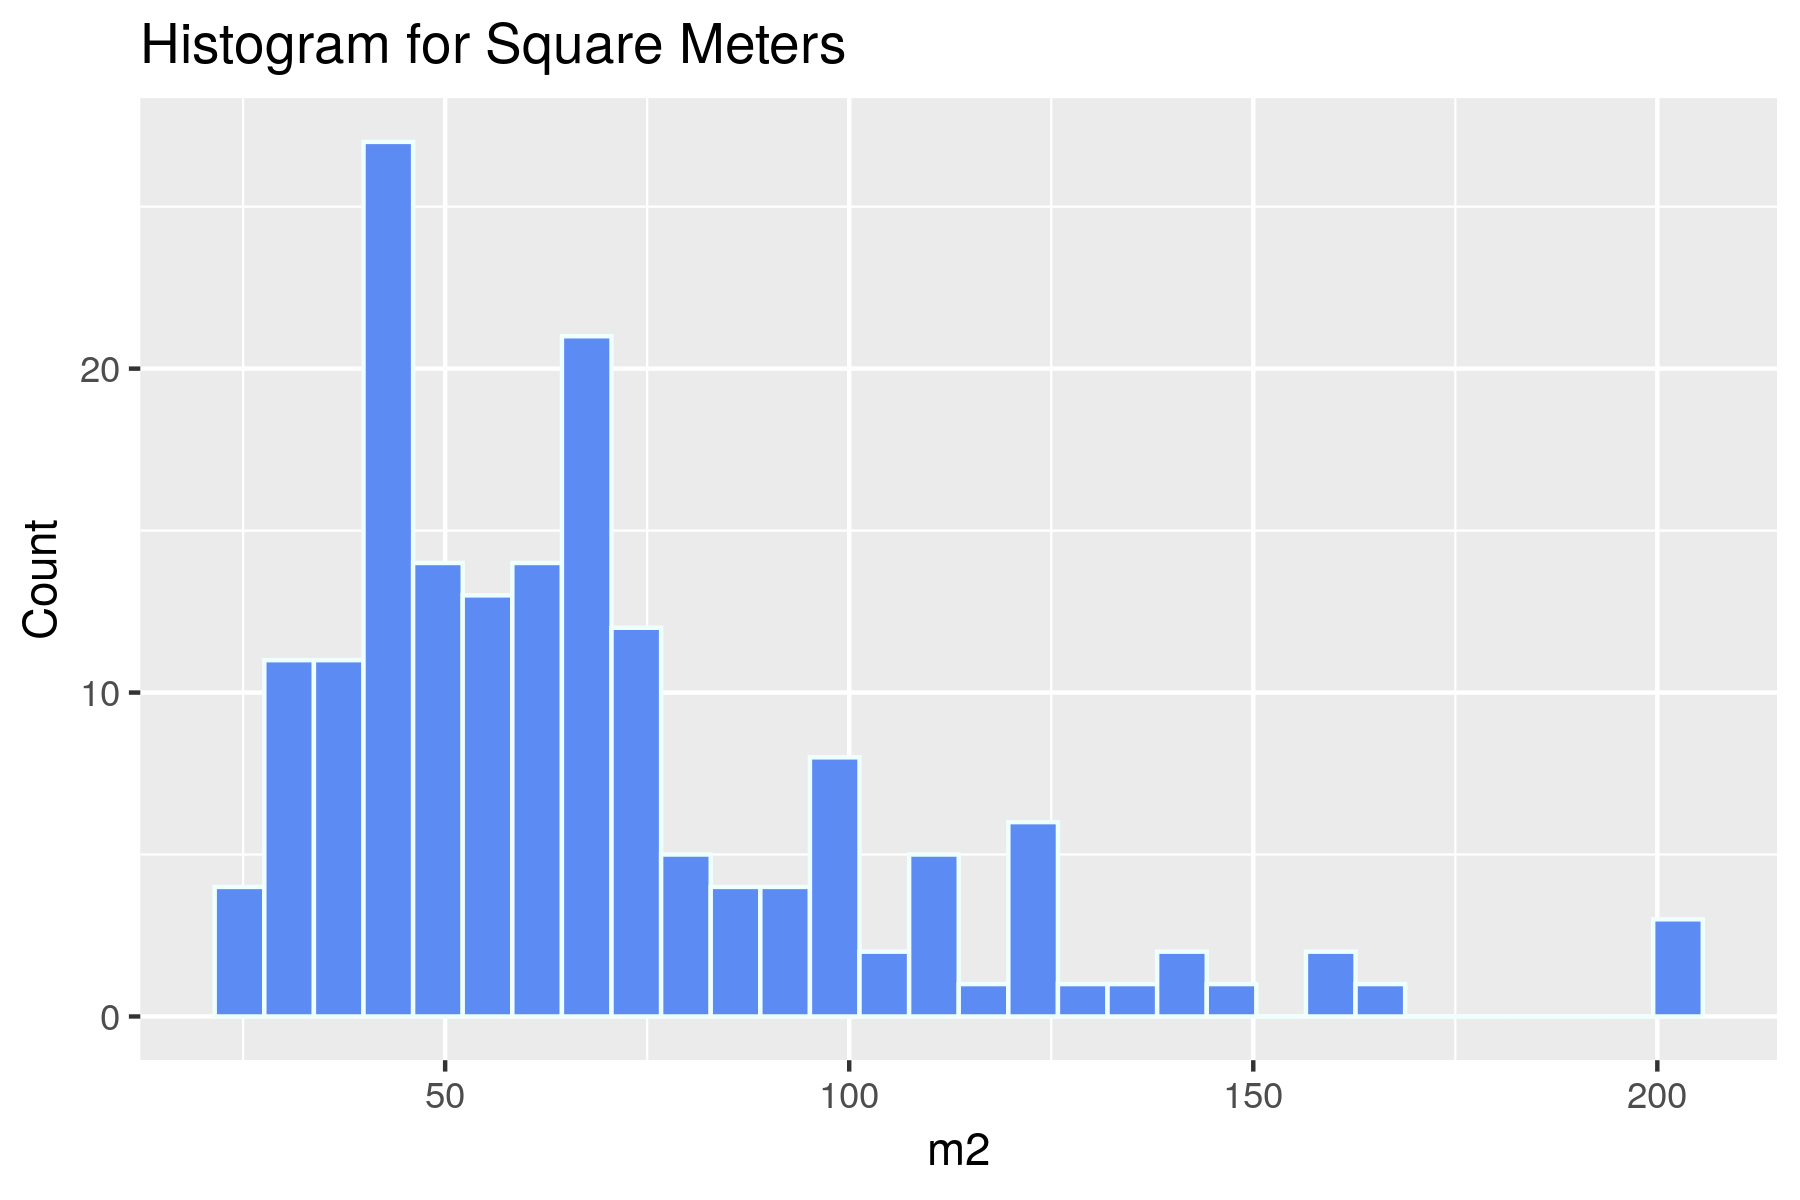

In [25]:
ggplot(data = df_madrid, aes(x = df_madrid$Square.Meters)) +
    geom_histogram(color = '#EFFFFD', fill='#5D8BF4') + 
    labs(title="Histogram for Square Meters", x="m2", y="Count") +
    scale_x_continuous(breaks = seq(50, 520, by=50))

In [26]:
nrow(df_madrid[!is.na(df_madrid$Square.Meters),])
nrow(df_madrid[is.na(df_madrid$Square.Meters),])
nrow(df_madrid[which(df_madrid$Square.Meters < 20), ])

[1] 173

[1] 5427

[1] 0

Existen varios Barrios que todas sus entradas de Square.Meters son NA, vamos a eliminar del dataset todos los pisos que pertenecen a estos barrios.

In [27]:
total_NA_Neighb <- df_madrid %>% group_by(Neighbourhood) %>% 
                    summarize(num_NA = sum(is.na(Square.Meters)), total_rows=n()) %>% 
                    filter(num_NA == total_rows)

In [28]:
total_NA_Neighb$Neighbourhood

[1] "Aluche"              "Arganzuela"          "Atocha"             
 [4] "Bellas Vistas"       "Berruguete"          "Castillejos"        
 [7] "Delicias"            "Estrella"            "Fuencarral-el Pardo"
[10] "Fuencarral-El Pardo" "Gaztambide"          "Guindalera"         
[13] "Hispanoamérica"      "Hortaleza"           "Ibiza"              
[16] "Imperial"            "La Chopera"          "Legazpi"            
[19] "Moncloa"             "Nueva España"        "Prosperidad"        
[22] "Puente de Vallecas"  "Tetuán"              "Valdeacederas"      
[25] "Vallehermosa"        "Villa de Vallecas"   "Villaverde"

In [29]:
df_madrid <- subset(df_madrid, !(Neighbourhood %in% c(total_NA_Neighb$Neighbourhood)))

In [30]:
dim(df_madrid)

[1] 4900   13

In [31]:
unique(df_madrid$Neighbourhood)

[1] "Embajadores"      "La Latina"        "Palacio"          "Malasaña"        
 [5] "Sol"              "Acacias"          "Palos do Moguer"  "Pacifico"        
 [9] "El Tréntaiseis"   "Jerónimos"        "Cortes"           "Justicia"        
[13] "Recoletos"        "Goya"             "Fuente del Berro" "Lista"           
[17] "Castilla"         "Cuatro Caminos"   "Arapiles"         "Trafalgar"       
[21] "Almagro"          "Rios Rosas"       "Argüelles"        "Usera"           
[25] "Ciudad Lineal"    "Adelfas"          "Retiro"           "Castellana"      
[29] "El Viso"          "Ciudad Jardin"    "Almenara"         "Carabanchel"     
[33] "Moratalaz"        "San Blas"         "Centro"           "Barajas"         
[37] "Chamberí"         "Vicálvaro"

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

**probar quitanto los NA contenidos en Square.Meters, mismo resultado**

In [32]:
#df_madrid <- df_madrid[!is.na(df_madrid$Square.Meters),]


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




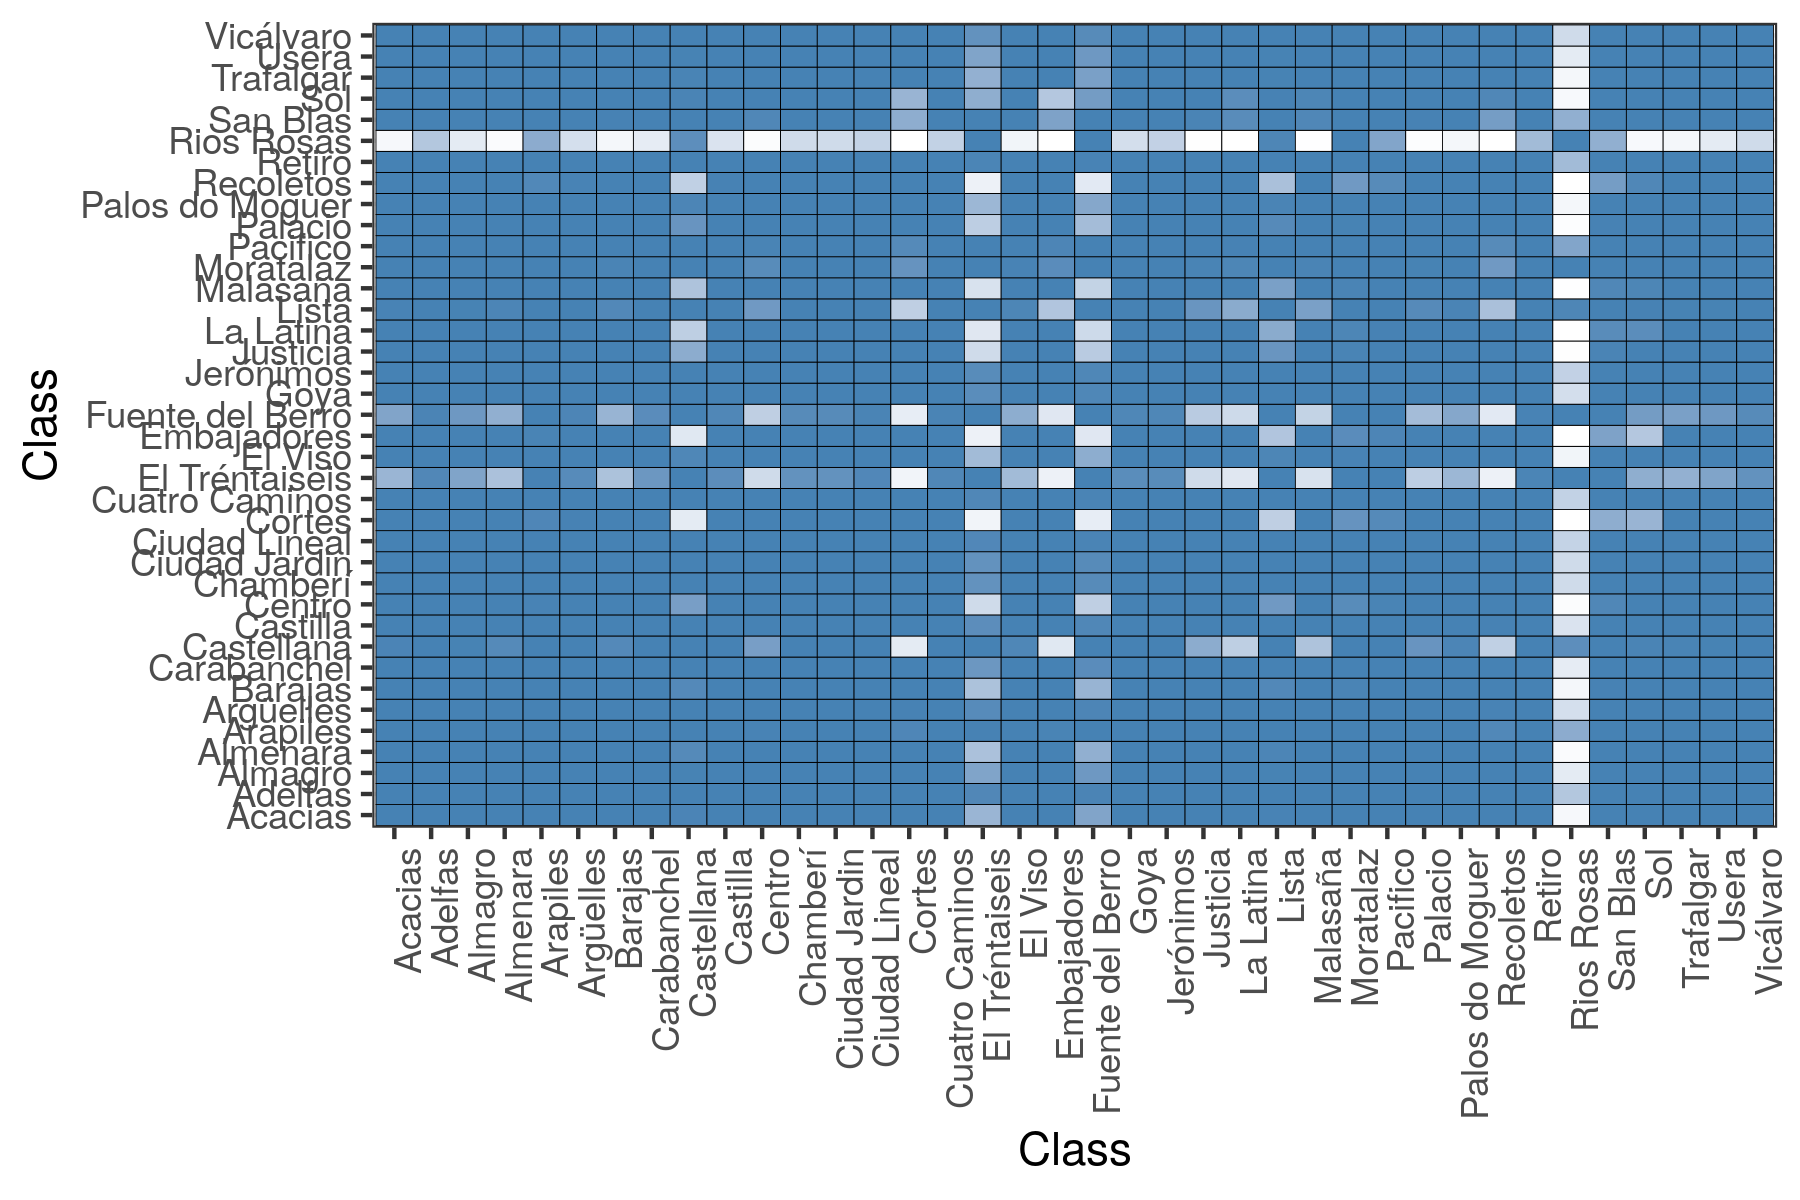

In [33]:
tky<-TukeyHSD(aov(formula=Square.Meters~Neighbourhood, data=df_madrid))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

In [34]:
library(dendextend)
library(cluster)


---------------------
Welcome to dendextend version 1.15.1
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:stats’:

    cutree




Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


In [35]:
df_madrid.dist<- as.dist(1 - resm)
str(df_madrid.dist)

 'dist' num [1:703] 0 0 0 0 0 0 0 0.0211 0 0 ...
 - attr(*, "Labels")= chr [1:38] "Acacias" "Adelfas" "Almagro" "Almenara" ...
 - attr(*, "Size")= int 38
 - attr(*, "call")= language as.dist.default(m = 1 - resm)
 - attr(*, "Diag")= logi FALSE
 - attr(*, "Upper")= logi FALSE


In [36]:
df_madrid.tree <- hclust(df_madrid.dist, method="complete")
df_madrid.dend <- as.dendrogram(df_madrid.tree) 

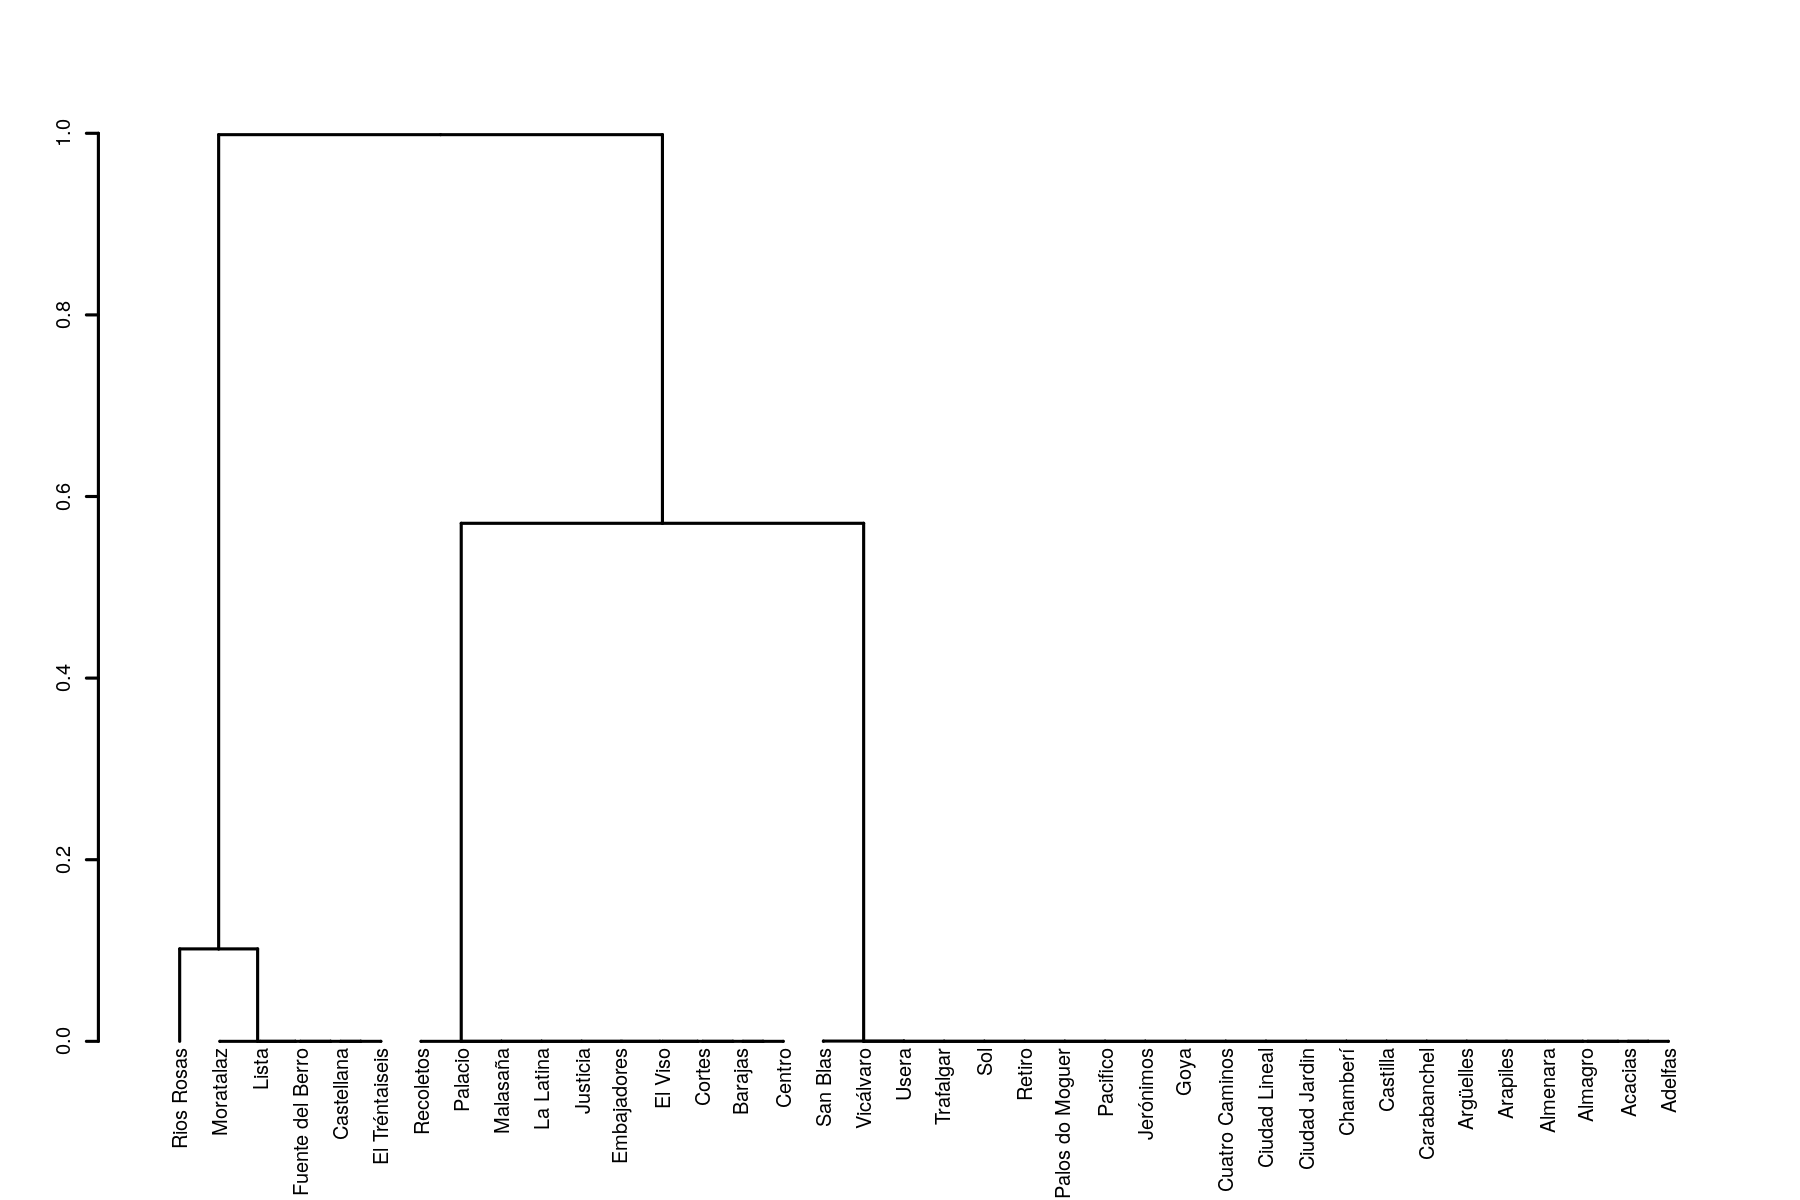

In [37]:
par(cex=0.4)
plot(df_madrid.dend)

¿Que punto de corte sería el aconsejable?, ¿cuantos clusters aparecen?

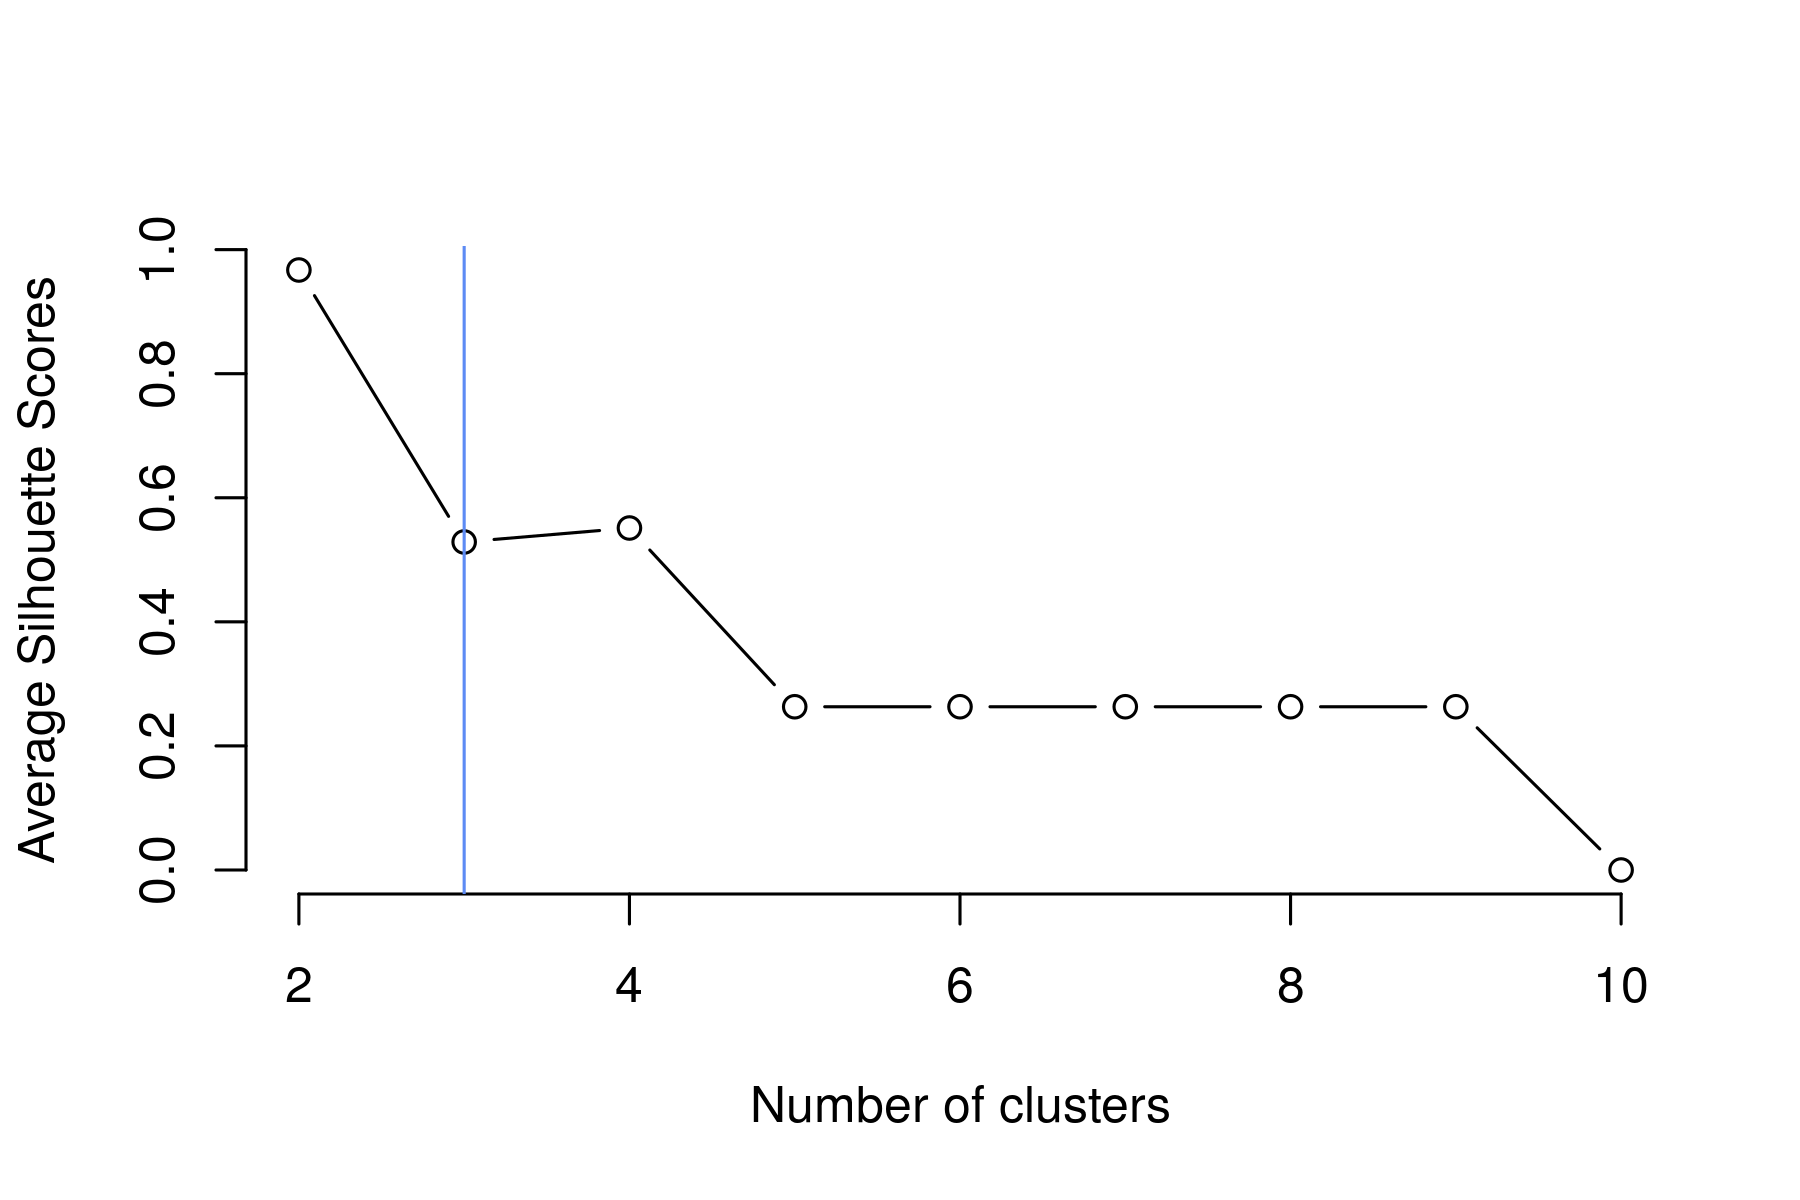

In [38]:
silhouette_score <- function(k){
  km <- kmeans(df_madrid.dist, centers = k, nstart=25)
  #ss <- silhouette(km$cluster, dist(df_madrid.dist))
  clusters <- cutree(df_madrid.dend, k)
  ss<-silhouette(clusters, df_madrid.dist)
  mean(ss[, 3])
}
k <- 2:10
avg_sil <- sapply(k, silhouette_score)
plot(k, type='b', avg_sil, xlab='Number of clusters', ylab='Average Silhouette Scores', frame=FALSE)
abline(v = 3, col='#5D8BF4')

<span style="color:#5D8BF4">Observamos el gráfico **Average Silhouette Scores** y fijándonos en las alturas de diversificación del dendrograma, optamos por una clasificación tripatita. Es decir, escogemos 3 cluster de clasificación para nuestro dataset.</span>

In [39]:
clusters <- cutree(df_madrid.dend, k=3)

In [40]:
table(clusters)

clusters
 1  2  3 
22 10  6 

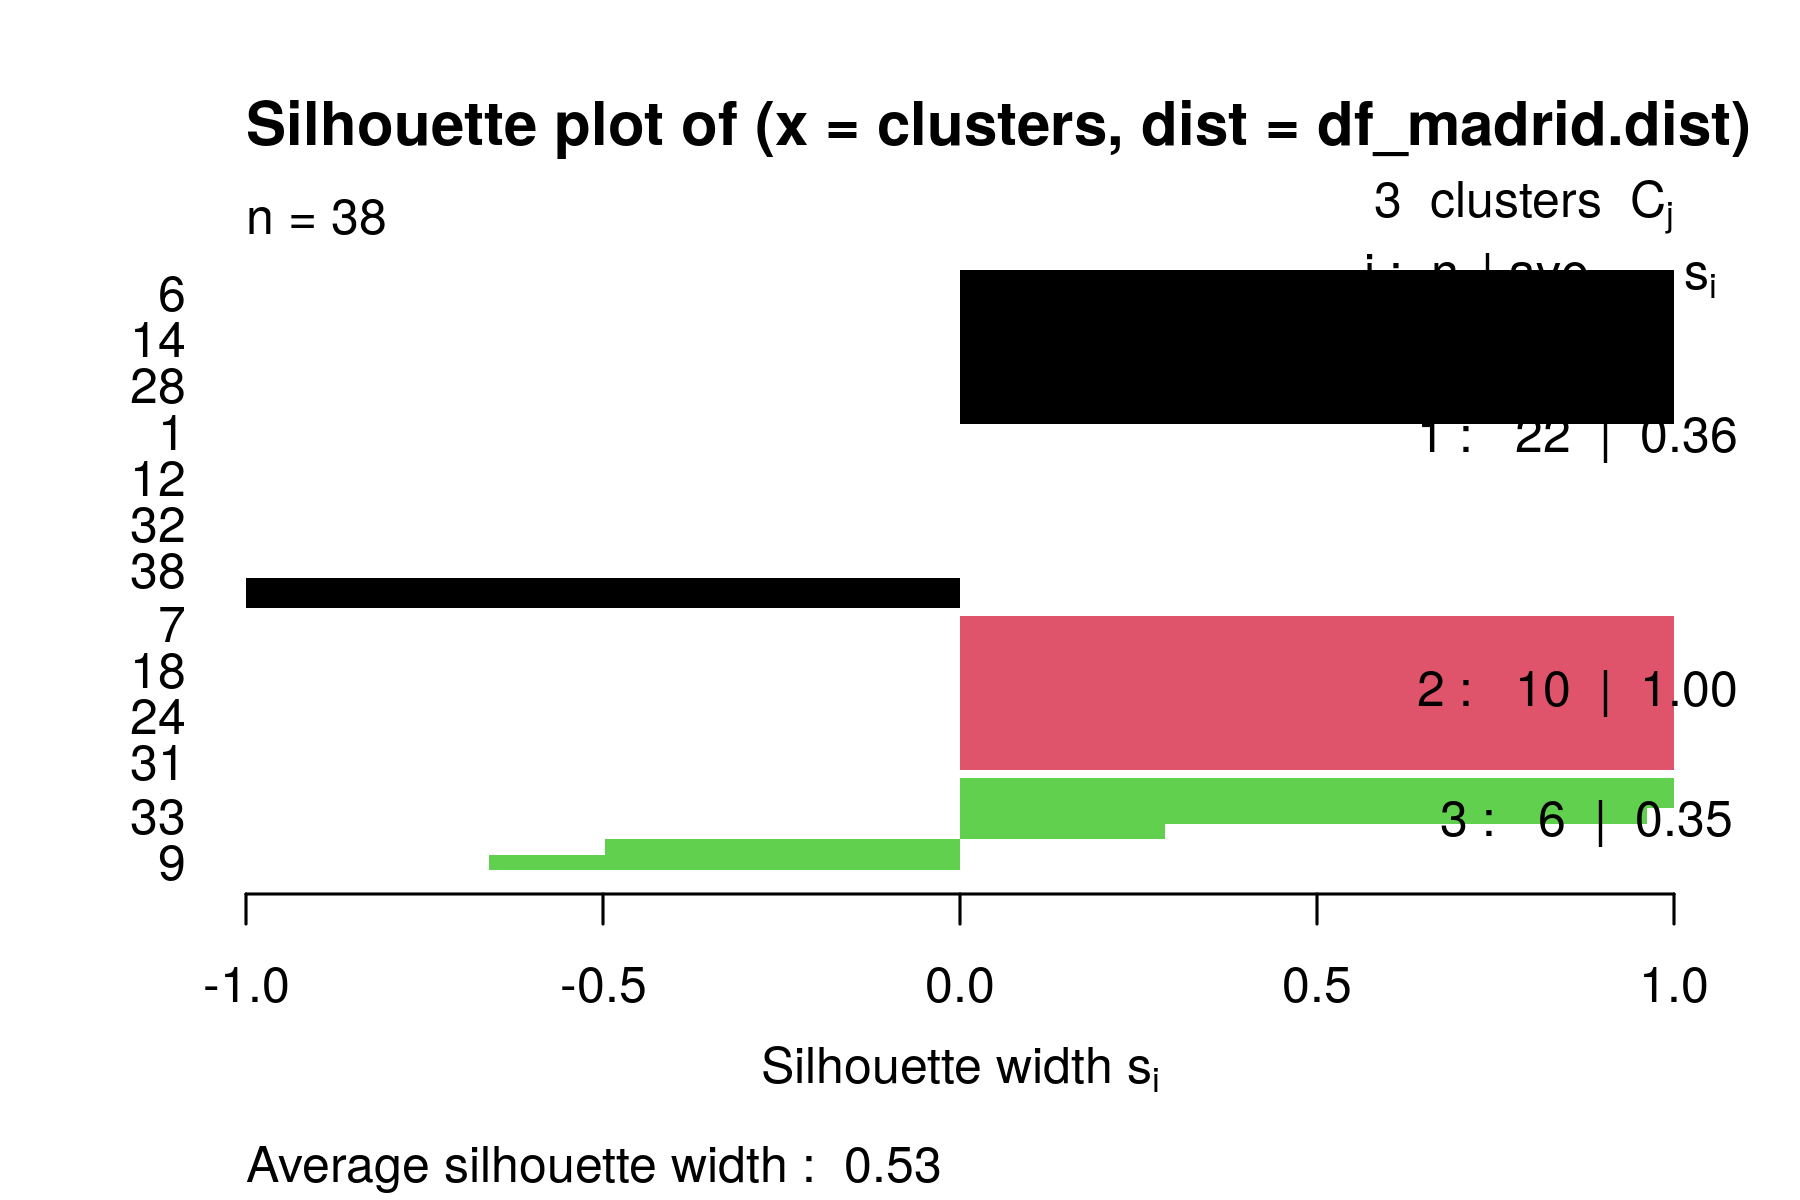

In [41]:
ss<-silhouette(clusters, df_madrid.dist)
plot(ss,col=1:max(clusters), border=NA)

In [42]:
#summary(ss)

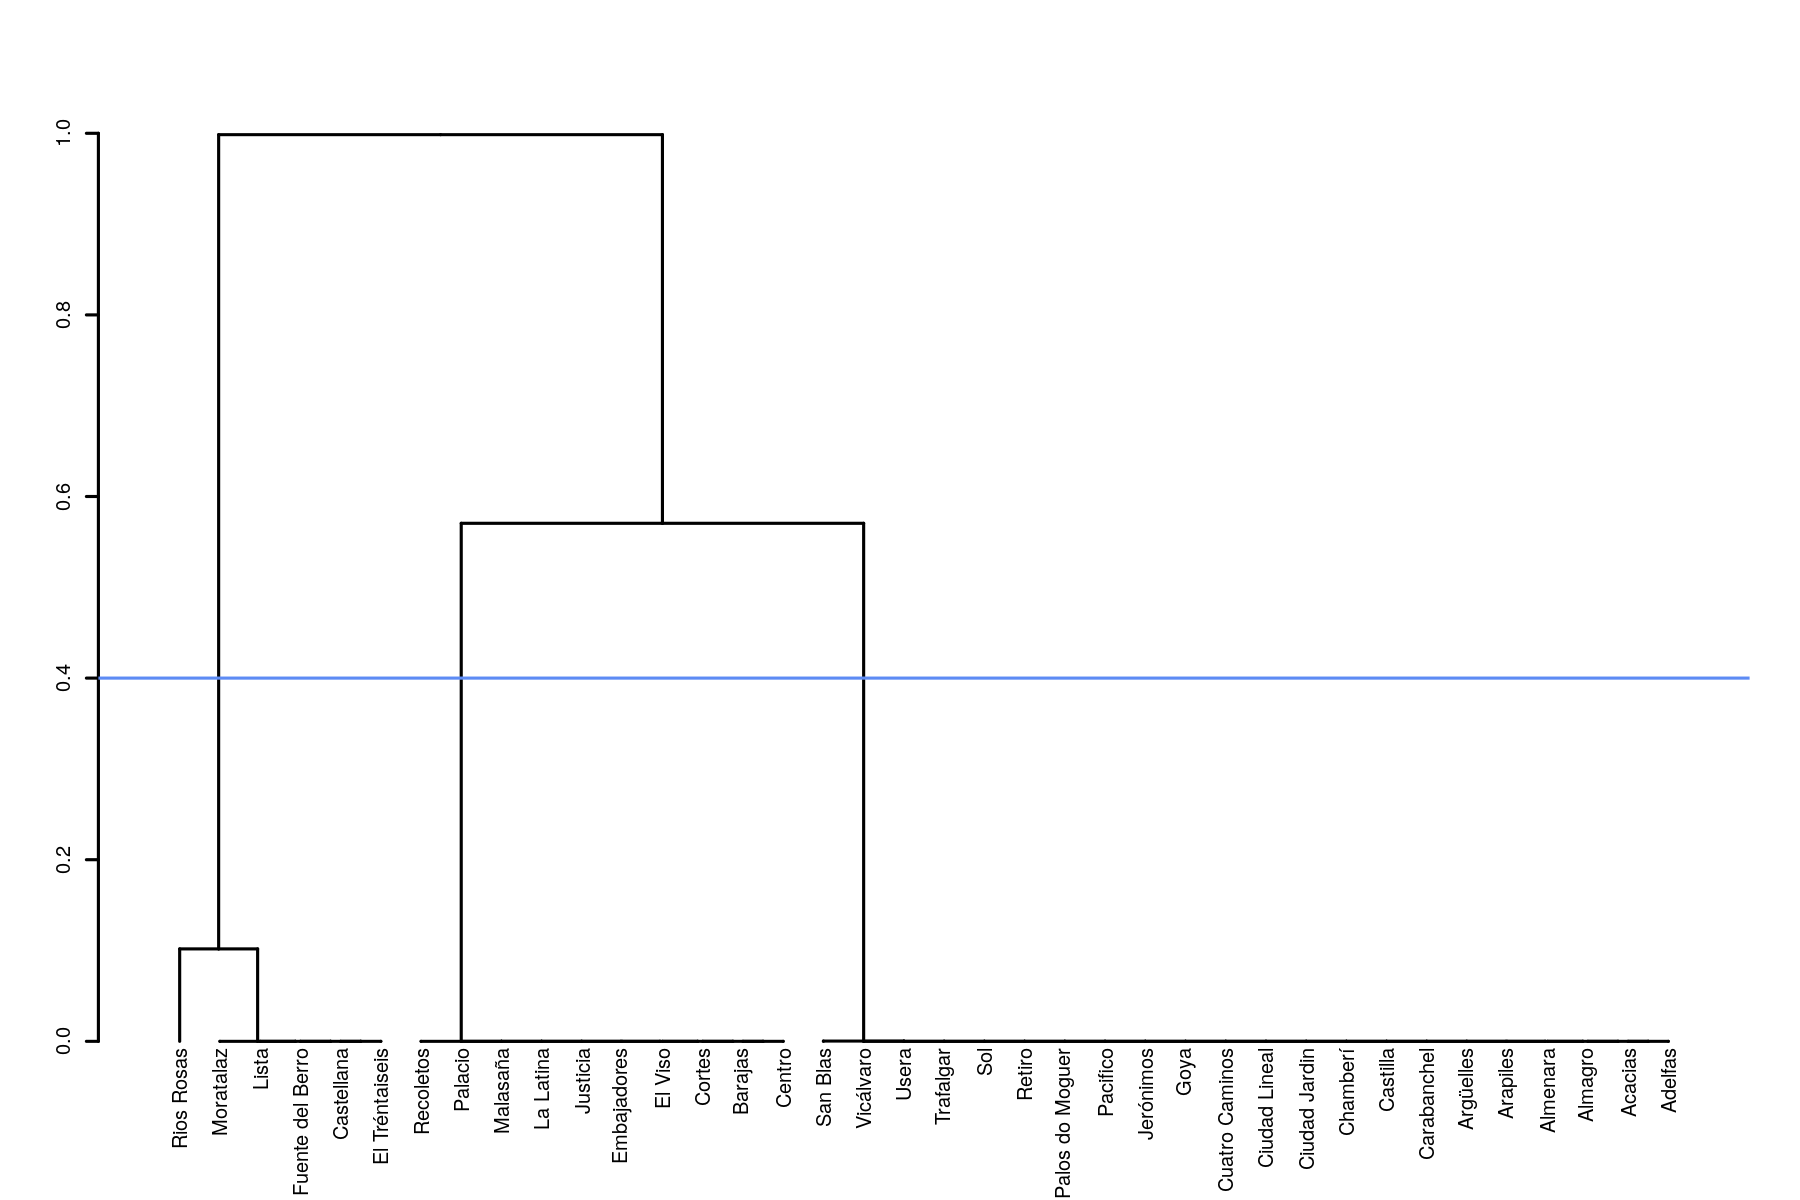

In [43]:
par(cex=0.4)
plot(df_madrid.dend)
abline(h=0.4,col='#5D8BF4')

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [44]:
clusters = cutree(df_madrid.tree, k=3)

In [45]:
neighb_cl = names(clusters)

In [46]:
df_neighb_cl = data.frame(neighb_cl, clusters)
names(df_neighb_cl)[2] <- "neighb_id"

In [47]:
df_madrid = merge(x=df_madrid, y=df_neighb_cl, by.x="Neighbourhood", by.y="neighb_cl")

In [48]:
head(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,Acacias,4,1.0,2,3,100,NA,1,0,NA,40.40540,-3.711909,NA,1
2,Acacias,4,2.0,2,4,90,NA,2,25,92,40.40435,-3.706820,NA,1
3,Acacias,4,1.0,1,2,60,538,2,15,98,40.40513,-3.707726,49.98181,1
4,Acacias,4,1.0,1,3,68,807,2,10,90,40.39691,-3.705202,74.97272,1
5,Acacias,2,0.5,0,2,30,NA,2,0,81,40.40351,-3.703586,NA,1
6,Acacias,4,1.0,3,3,60,NA,2,10,91,40.40563,-3.710020,NA,1


In [49]:
df_madrid$neighb_id <- as.factor(df_madrid$neighb_id)

In [50]:
head(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>
1,Acacias,4,1.0,2,3,100,NA,1,0,NA,40.40540,-3.711909,NA,1
2,Acacias,4,2.0,2,4,90,NA,2,25,92,40.40435,-3.706820,NA,1
3,Acacias,4,1.0,1,2,60,538,2,15,98,40.40513,-3.707726,49.98181,1
4,Acacias,4,1.0,1,3,68,807,2,10,90,40.39691,-3.705202,74.97272,1
5,Acacias,2,0.5,0,2,30,NA,2,0,81,40.40351,-3.703586,NA,1
6,Acacias,4,1.0,3,3,60,NA,2,10,91,40.40563,-3.710020,NA,1


In [51]:
summary(df_madrid)

 Neighbourhood       Accommodates      Bathrooms        Bedrooms    
 Length:4900        Min.   : 1.000   Min.   :0.000   Min.   : 0.00  
 Class :character   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.00  
 Mode  :character   Median : 4.000   Median :1.000   Median : 1.00  
                    Mean   : 4.089   Mean   :1.243   Mean   : 1.42  
                    3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.00  
                    Max.   :16.000   Max.   :6.000   Max.   :10.00  
                                     NA's   :14      NA's   :7      
      Beds            Price         Square.Feet     Guests.Included 
 Min.   : 1.000   Min.   : 18.00   Min.   :   0.0   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 59.00   1st Qu.:   0.0   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 323.0   Median : 2.000  
 Mean   : 2.364   Mean   : 90.34   Mean   : 392.4   Mean   : 1.954  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 646.0   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :800.00  

Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [52]:
library(ggplot2)

In [53]:
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [54]:
library(MASS)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [55]:
#usar para gráfico de matriz de correlaciones
df_madrid_filtered <- df_madrid[!is.na(df_madrid$Square.Meters),]
df_madrid_filtered <- na.omit(df_madrid)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



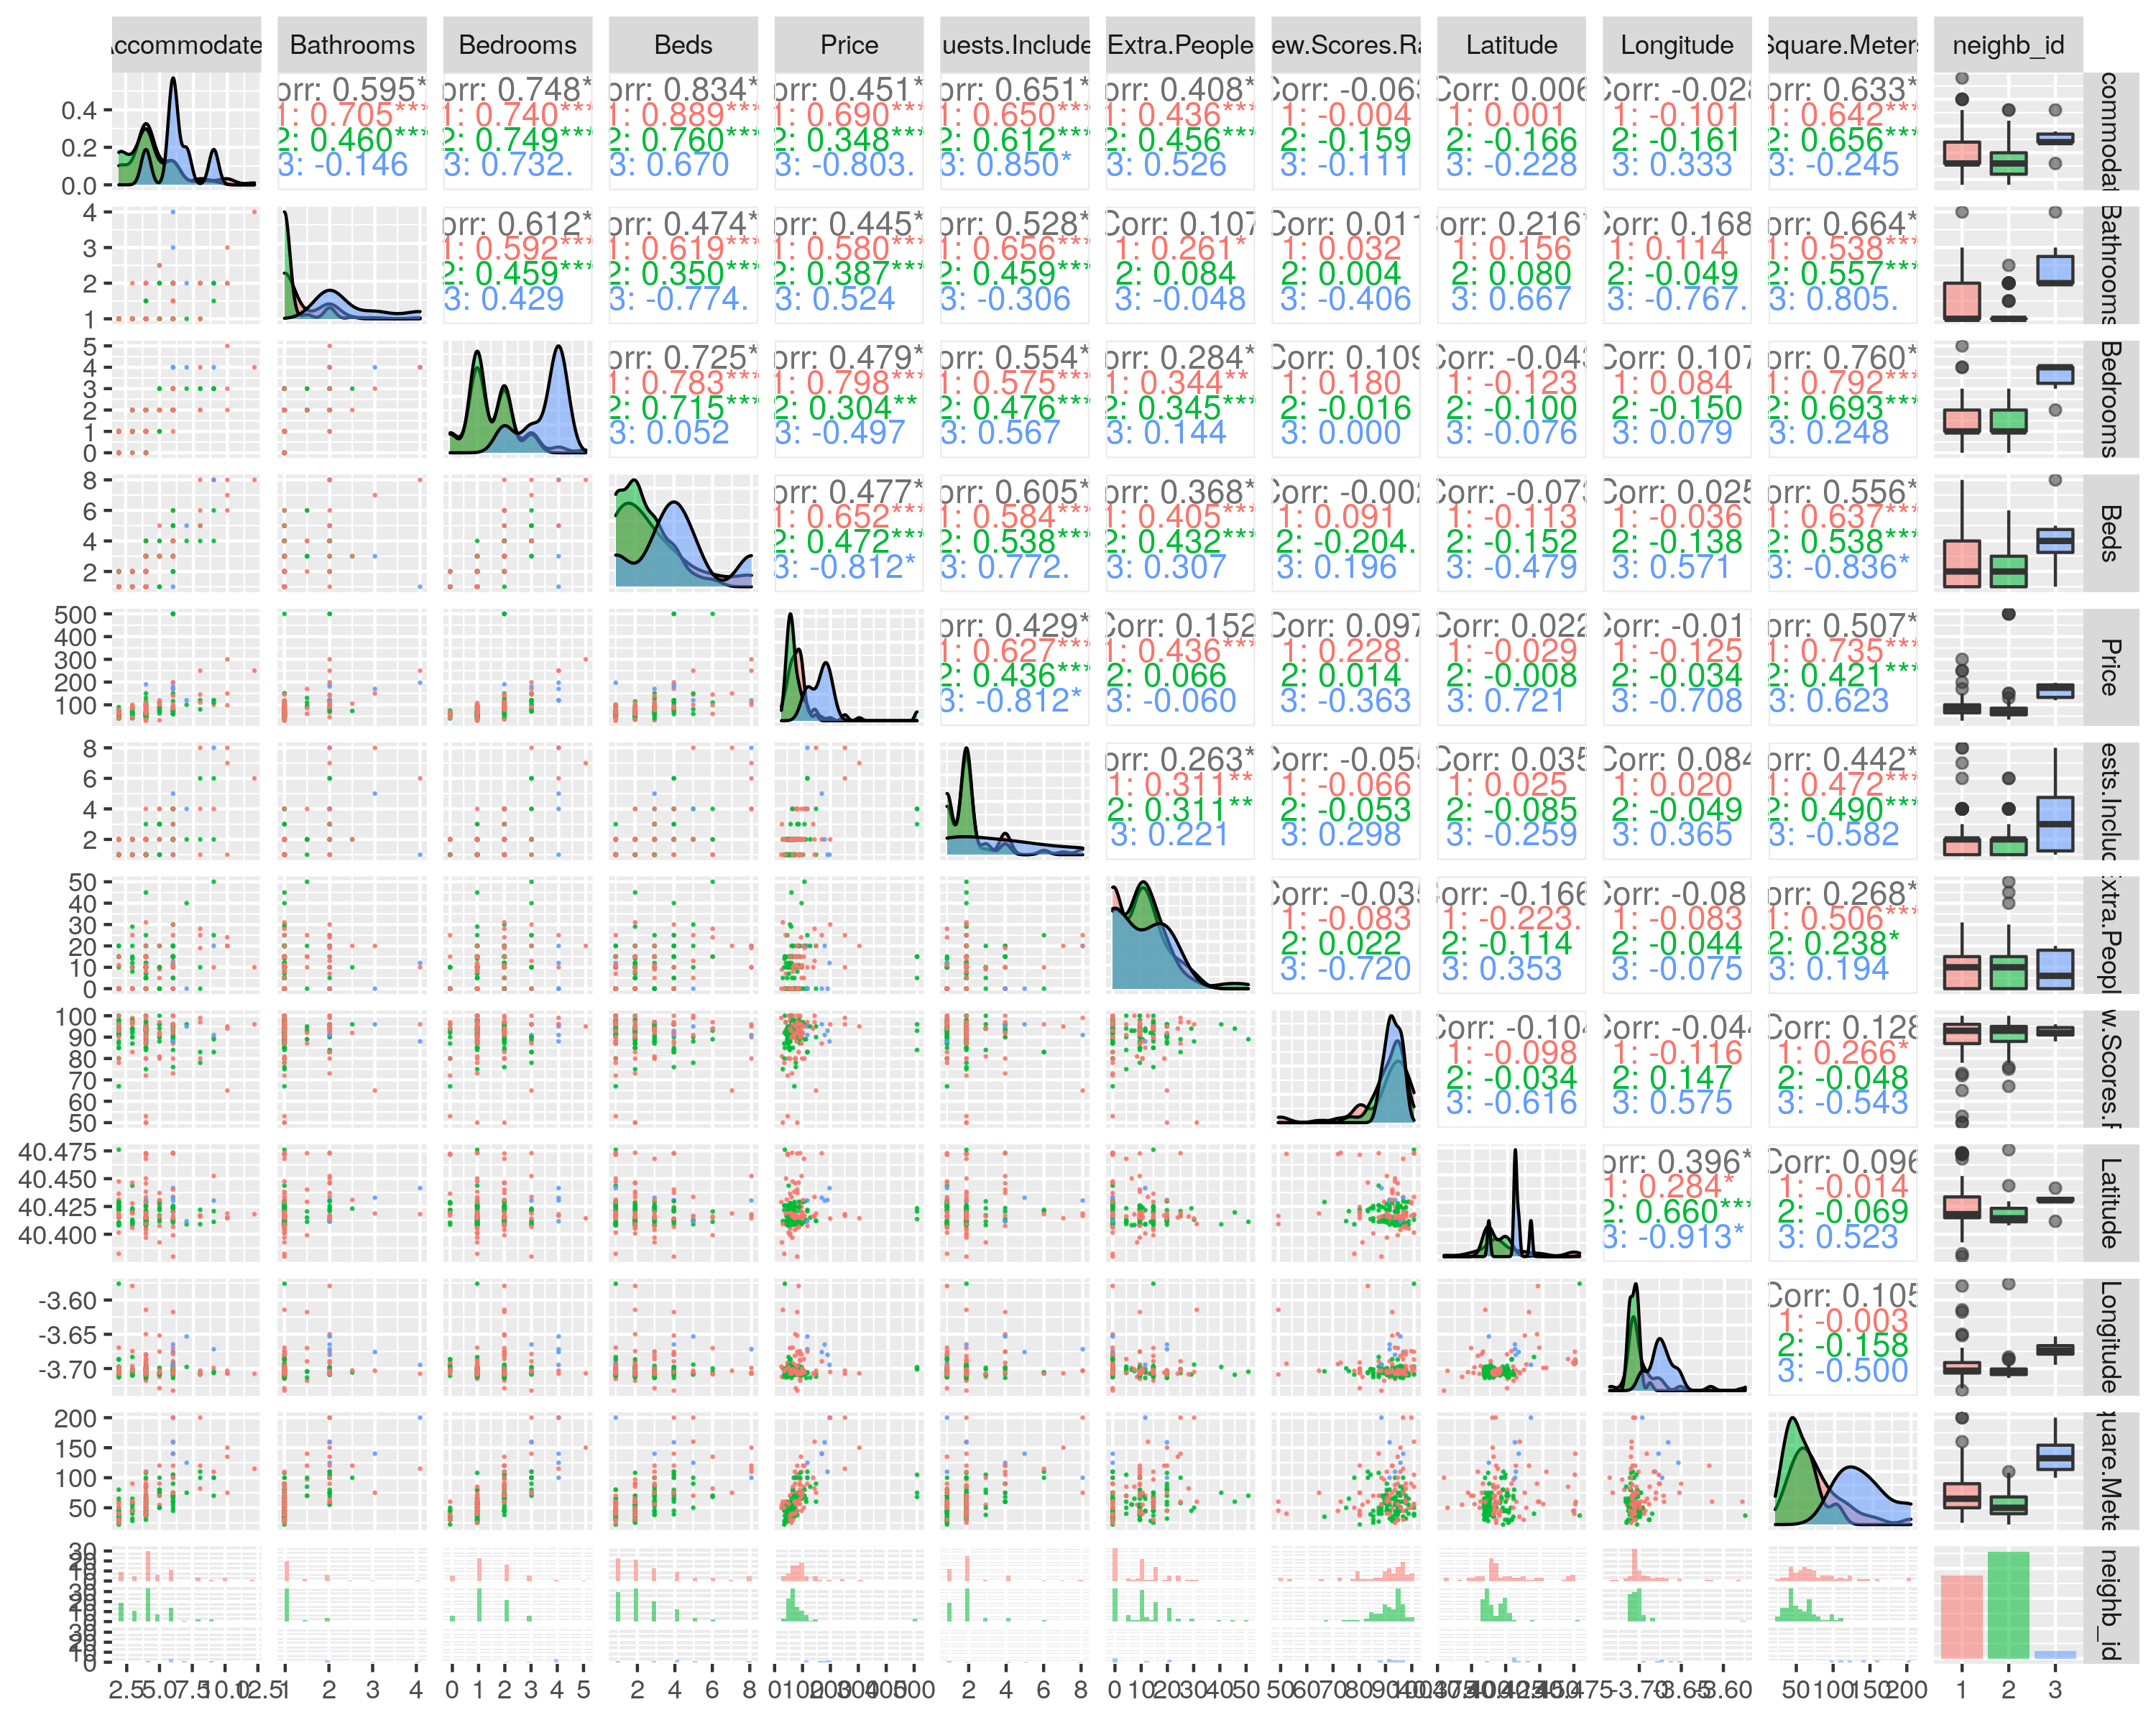

In [56]:
options(repr.plot.height=8,repr.plot.width=10)
ggpairs(df_madrid_filtered %>% dplyr::select(-Neighbourhood, -Square.Feet),ggplot2::aes(colour=neighb_id,alpha=0.5),
       lower = list(continuous = wrap("points", alpha = 0.8,size=0.1))
        )

<span style="color:#5D8BF4">   **Gráfico de correlaciones** Nos fijamos en las correlaciones que tiene la variable **Square.Meters** en relación con el resto. De ellos podemos extraer las siguientes conclusiones:
    
<span style="color:#5D8BF4">    1. Observando el gráfico con vistas a nuestro análisis mediante regresión lineal, podemos decir que es probable que nos encontremos con 5 coeficientes de cierto peso para la predicción de metros cuadrados: Accommodates, Bathrooms, Bedrooms, Beds y Price, cuyas correlaciones con respecto a Square.Meters van desde 0.5 hasta 0.76.

<span style="color:#5D8BF4">    2. Con respecto a la variable categórica de neighb_id podemos decir que se observa cierta dependencia entre ésta y las variables Accomodates, Bathrooms, Bedrooms y Beds.
    
<span style="color:#5D8BF4">    3. Es importante observar que el peso de muestras pertenecientes al cluster 3 son significativamente menores que en el cluster 1 y 2, algo que puede sesgar el modelo resultante de la regresión lineal, debido a las cantidad de muestras.
    
   <span style="color:#5D8BF4">    4. Observamos también que existen entre algunas de las variables predictoras una correlación apreciable, como puede ser el caso de Accommodates y Beds (0.834). Estas variables pueden presentar colinialidad por ello usaremos un modelo hacia adelante, en el que incluimos variable para valorar si el modelo mejora, empeora o se mantiene estable en su presencia.

<span style="color:#5D8BF4">   5. Las variables Price, Review.Scores.Rating y Extra.people parecen muestrar una distribución exponencial, por lo que una transformación logarítmica es posible que normalice su ditribución.
    
</span>

In [57]:
df_mad <- df_madrid %>% dplyr::select(-Neighbourhood, -Square.Feet)
df_mad <- df_mad[!is.na(df_mad$Square.Meters),]

In [58]:
set.seed(15)
idx <- sample(1:nrow(df_mad),nrow(df_mad)*0.7)
df_mad_train <- df_mad[idx,]
df_mad_test <- df_mad[-idx,]

<span style="color:#5D8BF4"> SUMMARY --> Analizando los **dataset de train y test** podemos dar por relativamente buenas las muestras, dado que en todas las variables los paramétrosos se mantienen relativamente estables. Sólo una de ella presenta un parámetro dispar: Extra.People Max.(train:50 test:250), pero su media en train y test es ceraca.</span>

In [59]:
summary(df_mad_train)
summary(df_mad_test)

  Accommodates      Bathrooms       Bedrooms          Beds      
 Min.   : 2.000   Min.   :1.00   Min.   :0.000   Min.   :1.000  
 1st Qu.: 3.000   1st Qu.:1.00   1st Qu.:1.000   1st Qu.:1.000  
 Median : 4.000   Median :1.00   Median :1.000   Median :2.000  
 Mean   : 4.364   Mean   :1.25   Mean   :1.567   Mean   :2.562  
 3rd Qu.: 5.000   3rd Qu.:1.00   3rd Qu.:2.000   3rd Qu.:3.000  
 Max.   :12.000   Max.   :4.00   Max.   :5.000   Max.   :8.000  
                  NA's   :1      NA's   :1                      
     Price       Guests.Included  Extra.People   Review.Scores.Rating
 Min.   : 20.0   Min.   :1.000   Min.   : 0.00   Min.   : 50.00      
 1st Qu.: 59.0   1st Qu.:1.000   1st Qu.: 0.00   1st Qu.: 89.00      
 Median : 72.0   Median :2.000   Median :10.00   Median : 93.00      
 Mean   : 94.2   Mean   :2.074   Mean   :10.17   Mean   : 90.52      
 3rd Qu.:100.0   3rd Qu.:2.000   3rd Qu.:15.00   3rd Qu.: 95.00      
 Max.   :500.0   Max.   :8.000   Max.   :50.00   Max.   :100

  Accommodates      Bathrooms        Bedrooms          Beds      
 Min.   : 2.000   Min.   :1.000   Min.   :0.000   Min.   :1.000  
 1st Qu.: 4.000   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000  
 Median : 4.000   Median :1.000   Median :1.000   Median :2.000  
 Mean   : 4.654   Mean   :1.382   Mean   :1.673   Mean   :2.827  
 3rd Qu.: 6.000   3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:4.000  
 Max.   :10.000   Max.   :4.000   Max.   :4.000   Max.   :8.000  
                  NA's   :1                                      
     Price        Guests.Included  Extra.People    Review.Scores.Rating
 Min.   : 30.00   Min.   :1.000   Min.   :  0.00   Min.   : 65.00      
 1st Qu.: 60.00   1st Qu.:1.000   1st Qu.:  0.00   1st Qu.: 87.00      
 Median : 80.00   Median :2.000   Median : 10.00   Median : 92.50      
 Mean   : 95.71   Mean   :2.135   Mean   : 14.46   Mean   : 89.78      
 3rd Qu.:100.00   3rd Qu.:2.000   3rd Qu.: 15.00   3rd Qu.: 95.00      
 Max.   :500.00   Max.   :8.000   Max.  

In [60]:
stepAIC(lm(data=df_mad_train, formula=Square.Meters~.))

Start:  AIC=661.65
Square.Meters ~ Accommodates + Bathrooms + Bedrooms + Beds + 
    Price + Guests.Included + Extra.People + Review.Scores.Rating + 
    Latitude + Longitude + neighb_id

                       Df Sum of Sq   RSS    AIC
- Beds                  1      36.8 28958 659.80
- Price                 1      85.9 29007 659.99
- Longitude             1     243.1 29164 660.61
- Guests.Included       1     243.7 29165 660.62
- Accommodates          1     363.4 29285 661.09
- Extra.People          1     365.4 29287 661.09
- Latitude              1     428.3 29350 661.34
- Bathrooms             1     464.7 29386 661.48
<none>                              28921 661.65
- Review.Scores.Rating  1    2015.0 30936 667.40
- Bedrooms              1    8845.2 37766 690.34
- neighb_id             2   11941.6 40863 697.40

Step:  AIC=659.8
Square.Meters ~ Accommodates + Bathrooms + Bedrooms + Price + 
    Guests.Included + Extra.People + Review.Scores.Rating + Latitude + 
    Longitude + neighb


Call:
lm(formula = Square.Meters ~ Accommodates + Bathrooms + Bedrooms + 
    Review.Scores.Rating + neighb_id, data = df_mad_train)

Coefficients:
         (Intercept)          Accommodates             Bathrooms  
            -20.3219                3.0067                7.4749  
            Bedrooms  Review.Scores.Rating            neighb_id2  
             16.4544                0.5456              -19.7472  
          neighb_id3  
             47.2733  


In [61]:
model1<-lm(data=df_mad_train, formula=Square.Meters~Bathrooms+Bedrooms+Price:neighb_id+Extra.People)
summary(model1)


Call:
lm(formula = Square.Meters ~ Bathrooms + Bedrooms + Price:neighb_id + 
    Extra.People, data = df_mad_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-50.012 -12.236   0.312   8.951  47.249 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      20.620431   4.741621   4.349 3.03e-05 ***
Bathrooms         8.346425   4.274327   1.953 0.053352 .  
Bedrooms         15.289667   2.376368   6.434 3.17e-09 ***
Extra.People      0.295892   0.186168   1.589 0.114794    
Price:neighb_id1  0.187608   0.040628   4.618 1.04e-05 ***
Price:neighb_id2  0.007417   0.028288   0.262 0.793644    
Price:neighb_id3  0.125993   0.036498   3.452 0.000786 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.79 on 112 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.7082,	Adjusted R-squared:  0.6926 
F-statistic: 45.31 on 6 and 112 DF,  p-value: < 2.2e-16


In [62]:
df_mad_train$pred_m2<- predict(model1, df_mad_train)
df_mad_test$pred_m2<- predict(model1, df_mad_test)

In [63]:
print("Traning:")
caret::postResample(pred=df_mad_train$pred_m2, obs=df_mad_train$Square.Meters)
print("Testing:")
caret::postResample(pred=df_mad_test$pred_m2, obs=df_mad_test$Square.Meters)

[1] "Traning:"


RMSE  Rsquared       MAE 
17.258955  0.708222 13.299243

[1] "Testing:"


RMSE   Rsquared        MAE 
20.3964979  0.7328915 13.4135299

<span style="color:#5D8BF4"> Con un R^2 mayor en test que en train vemos que nuestro modelo no presnta overfitting. Observamos que el valor de RMSE así como en MAE es mayor en train que en test, lo que indica un mayor error en las predicciones, es decir, predicciones con un margen de error mayor.</span>

Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

In [64]:
options(repr.plot.height=7,repr.plot.width=10)

Warning message:
“Removed 2 rows containing missing values (geom_point).”


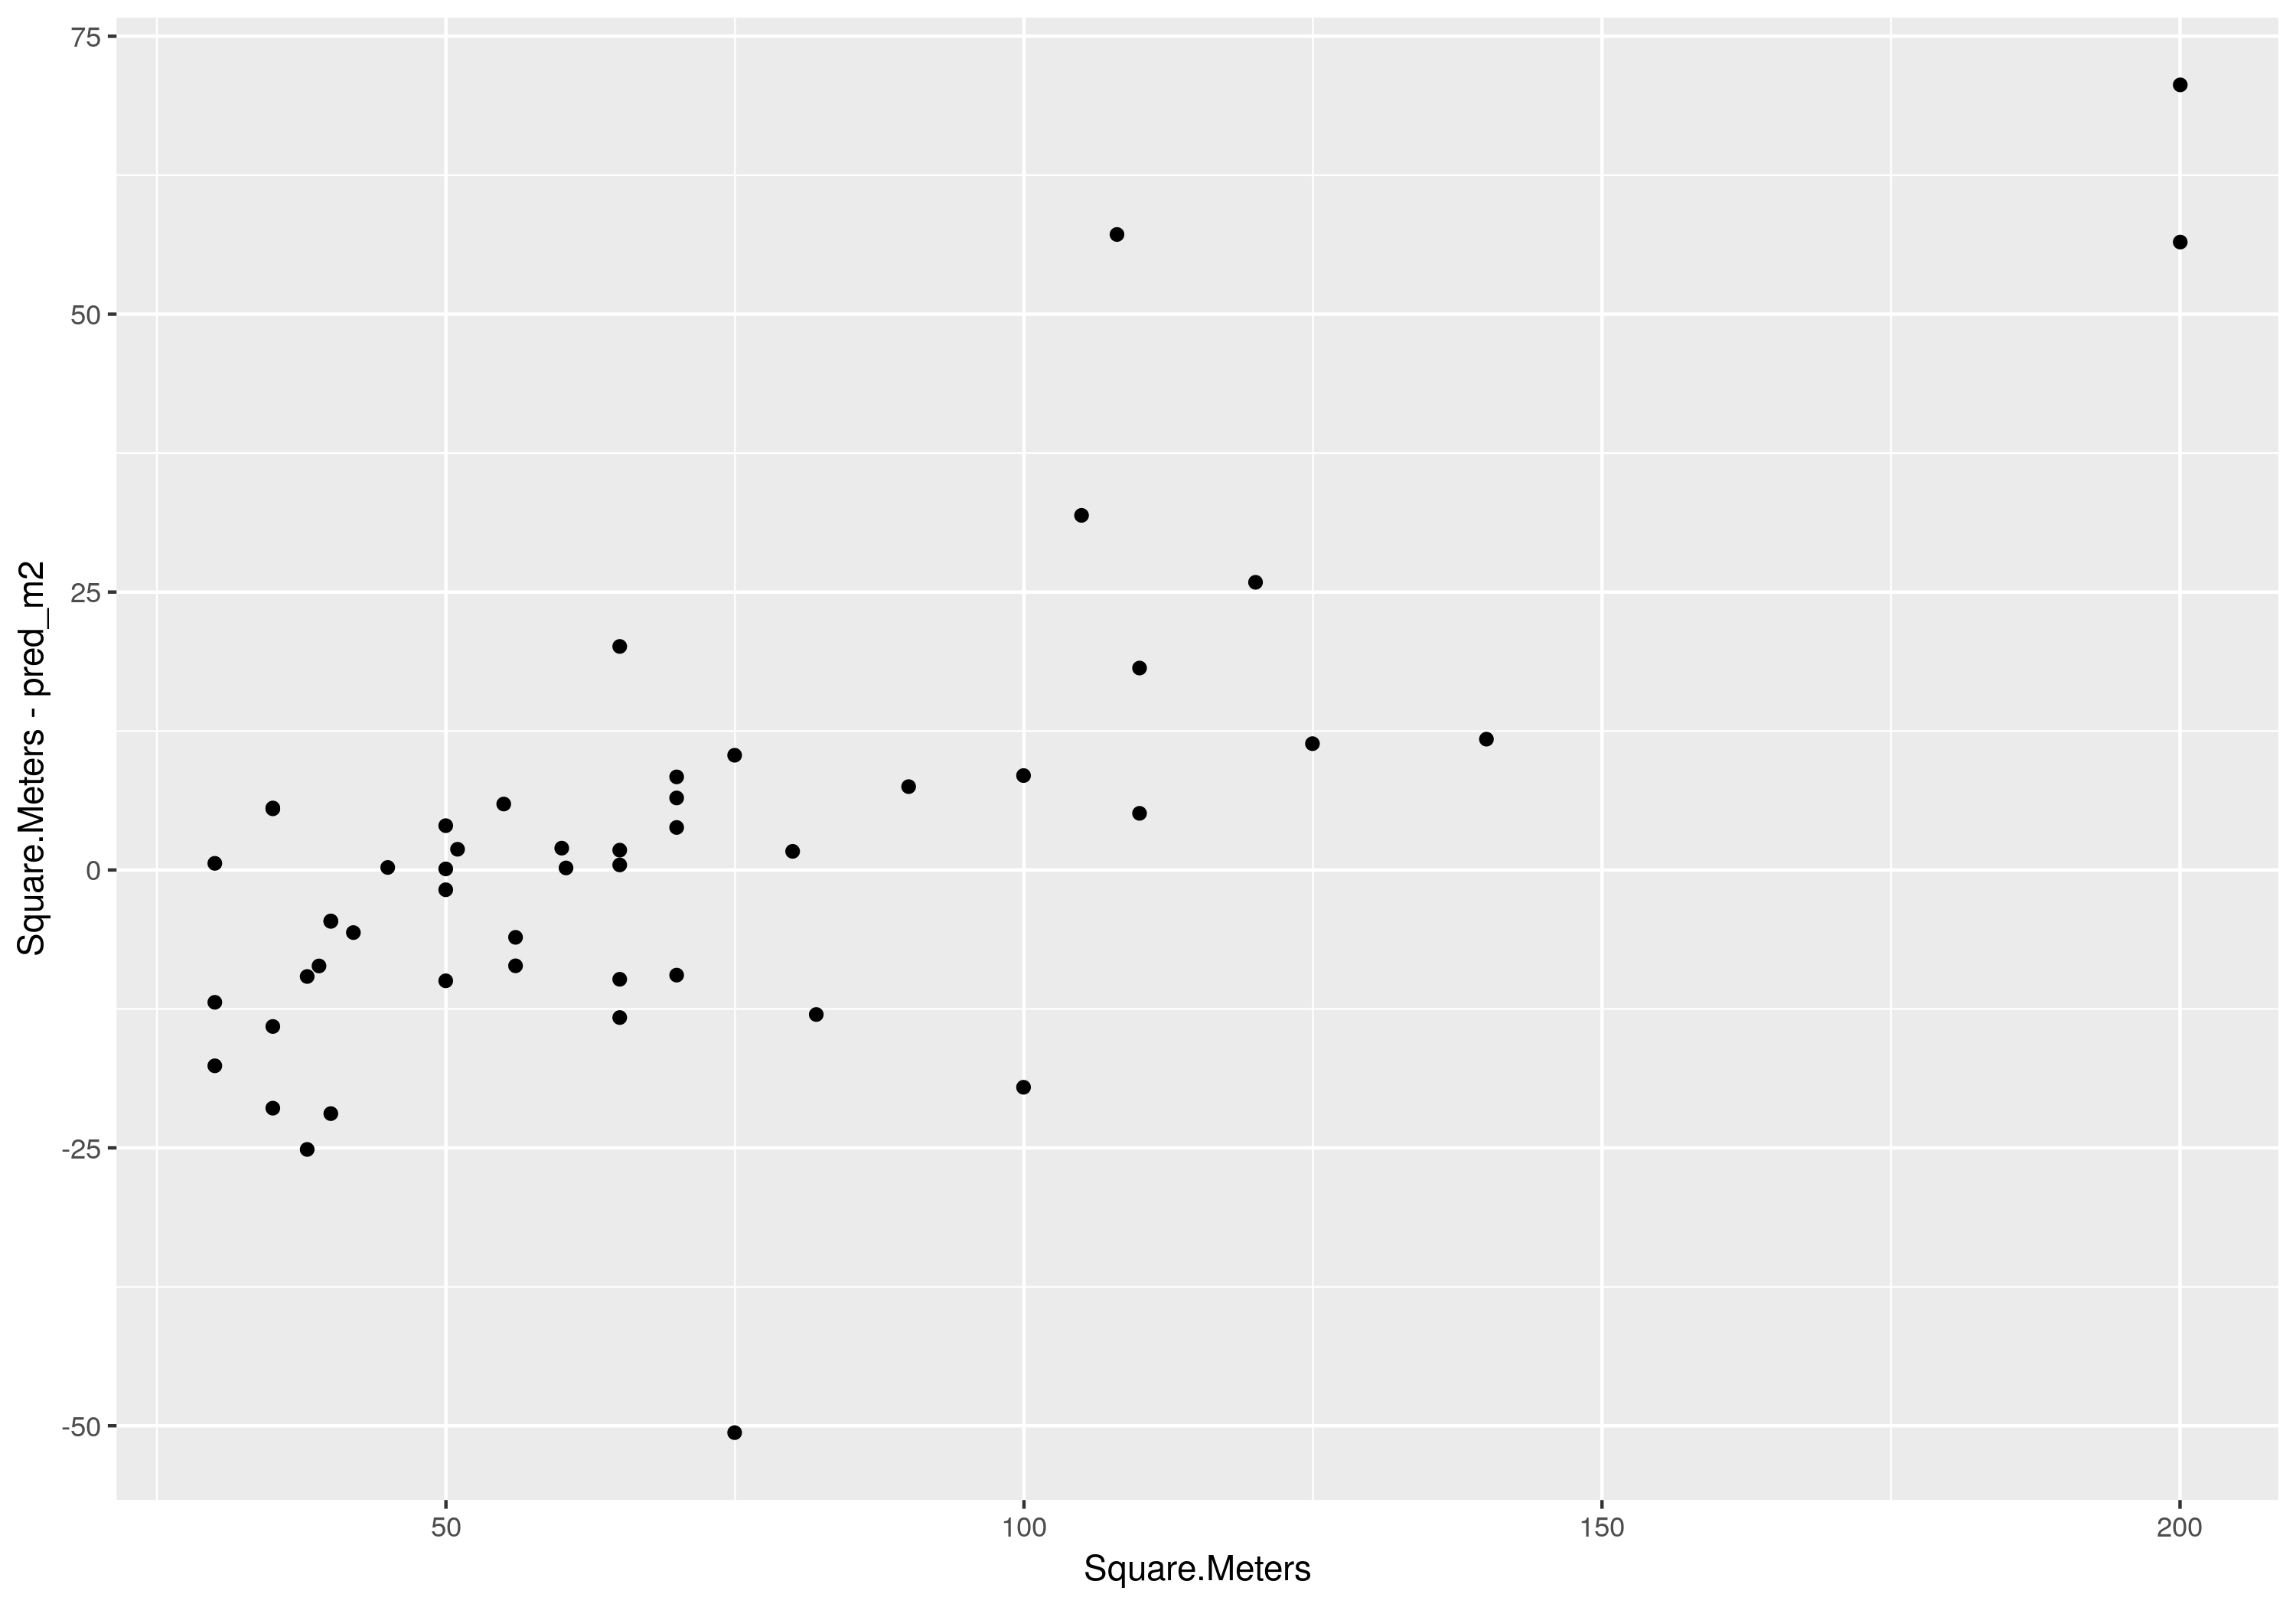

In [65]:
ggplot(df_mad_test, aes(x=Square.Meters, y=Square.Meters-pred_m2))+geom_point()

<span style="color:#5D8BF4">La distribuón de residuos no parece guardar linealiad entorno al 0 en el eje X, por encima de 100m2 el modelo tiene sesgos.</span>

Warning message:
“Removed 2 rows containing missing values (geom_point).”


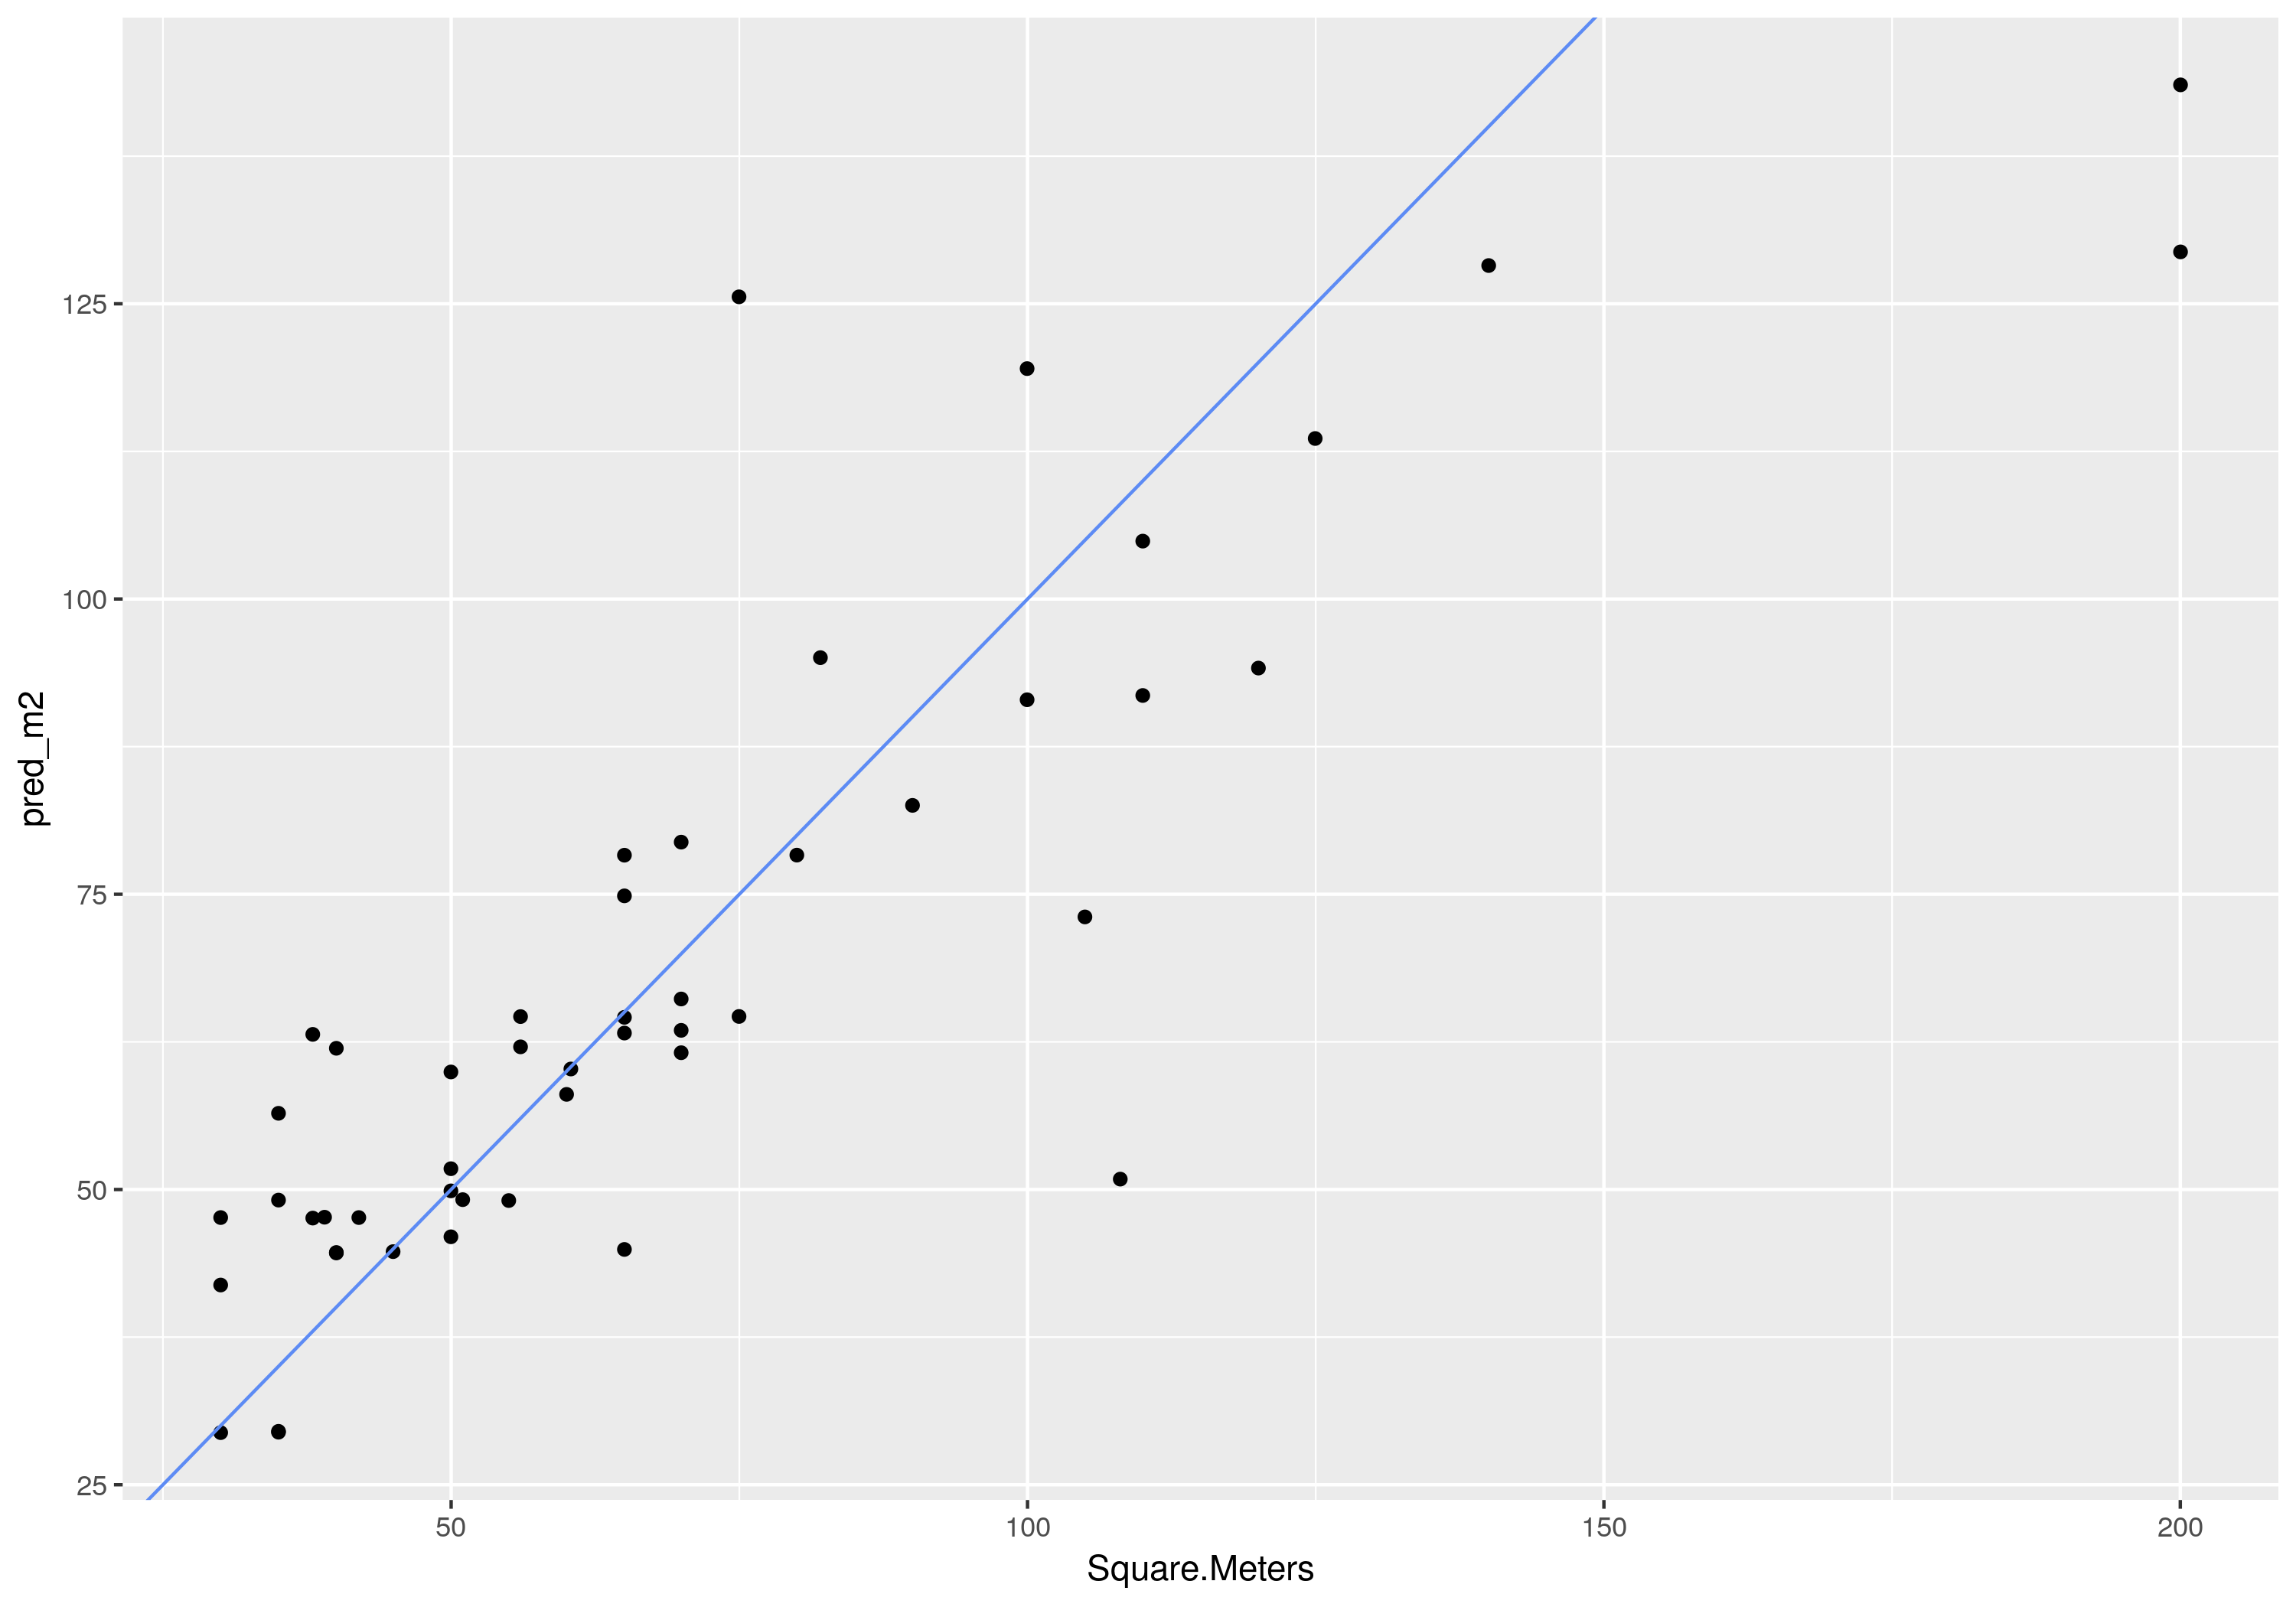

In [66]:
ggplot(df_mad_test, aes(x=Square.Meters, y=pred_m2))+geom_point()+geom_abline(intercept=0, slope=1, color='#5D8BF4')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”


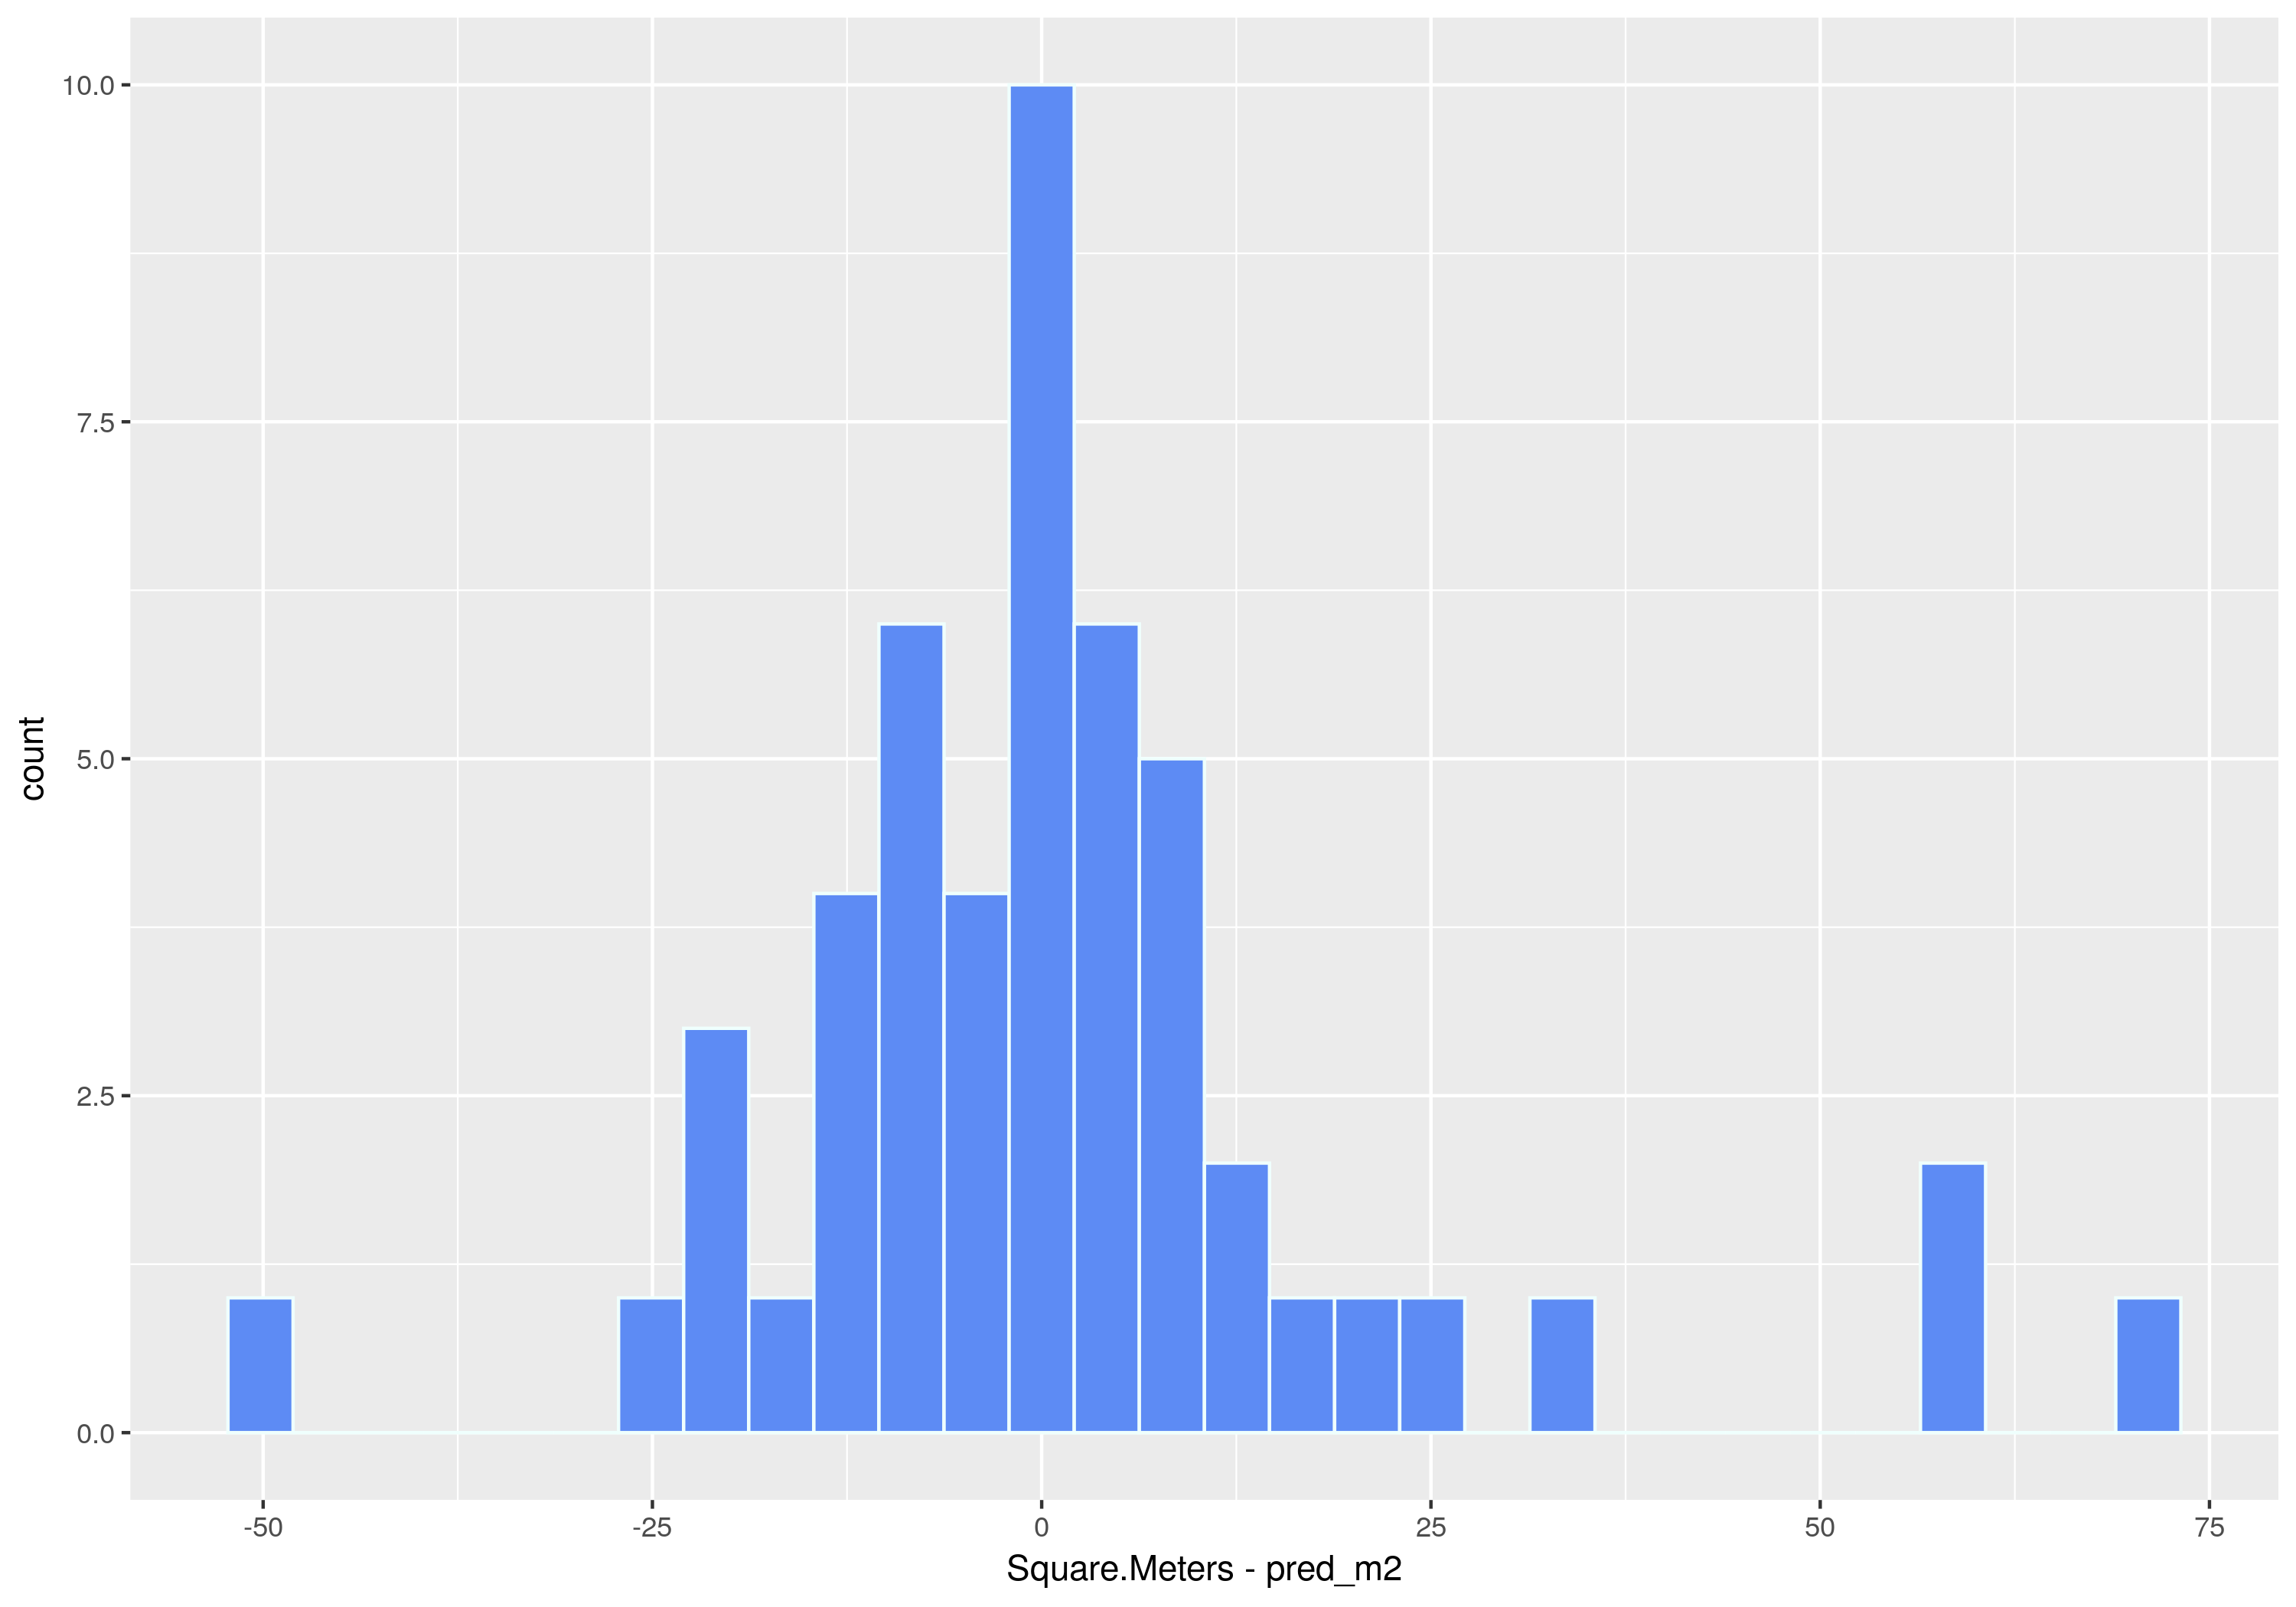

In [67]:
ggplot(df_mad_test, aes(x=Square.Meters-pred_m2))+geom_histogram(color = '#EFFFFD', fill='#5D8BF4')

<span style="color:#5D8BF4">La distribuón de residuos no parece que siguen una distribución normal, exiten valores a la derecha que generan una cola en el histograma. Lo que indica que el modelo ha predicho datos a la alta. Para ver la distribución entrono a la normalidad y las colas de nuestras predicciones mostramos el digrama QQNORM </span>

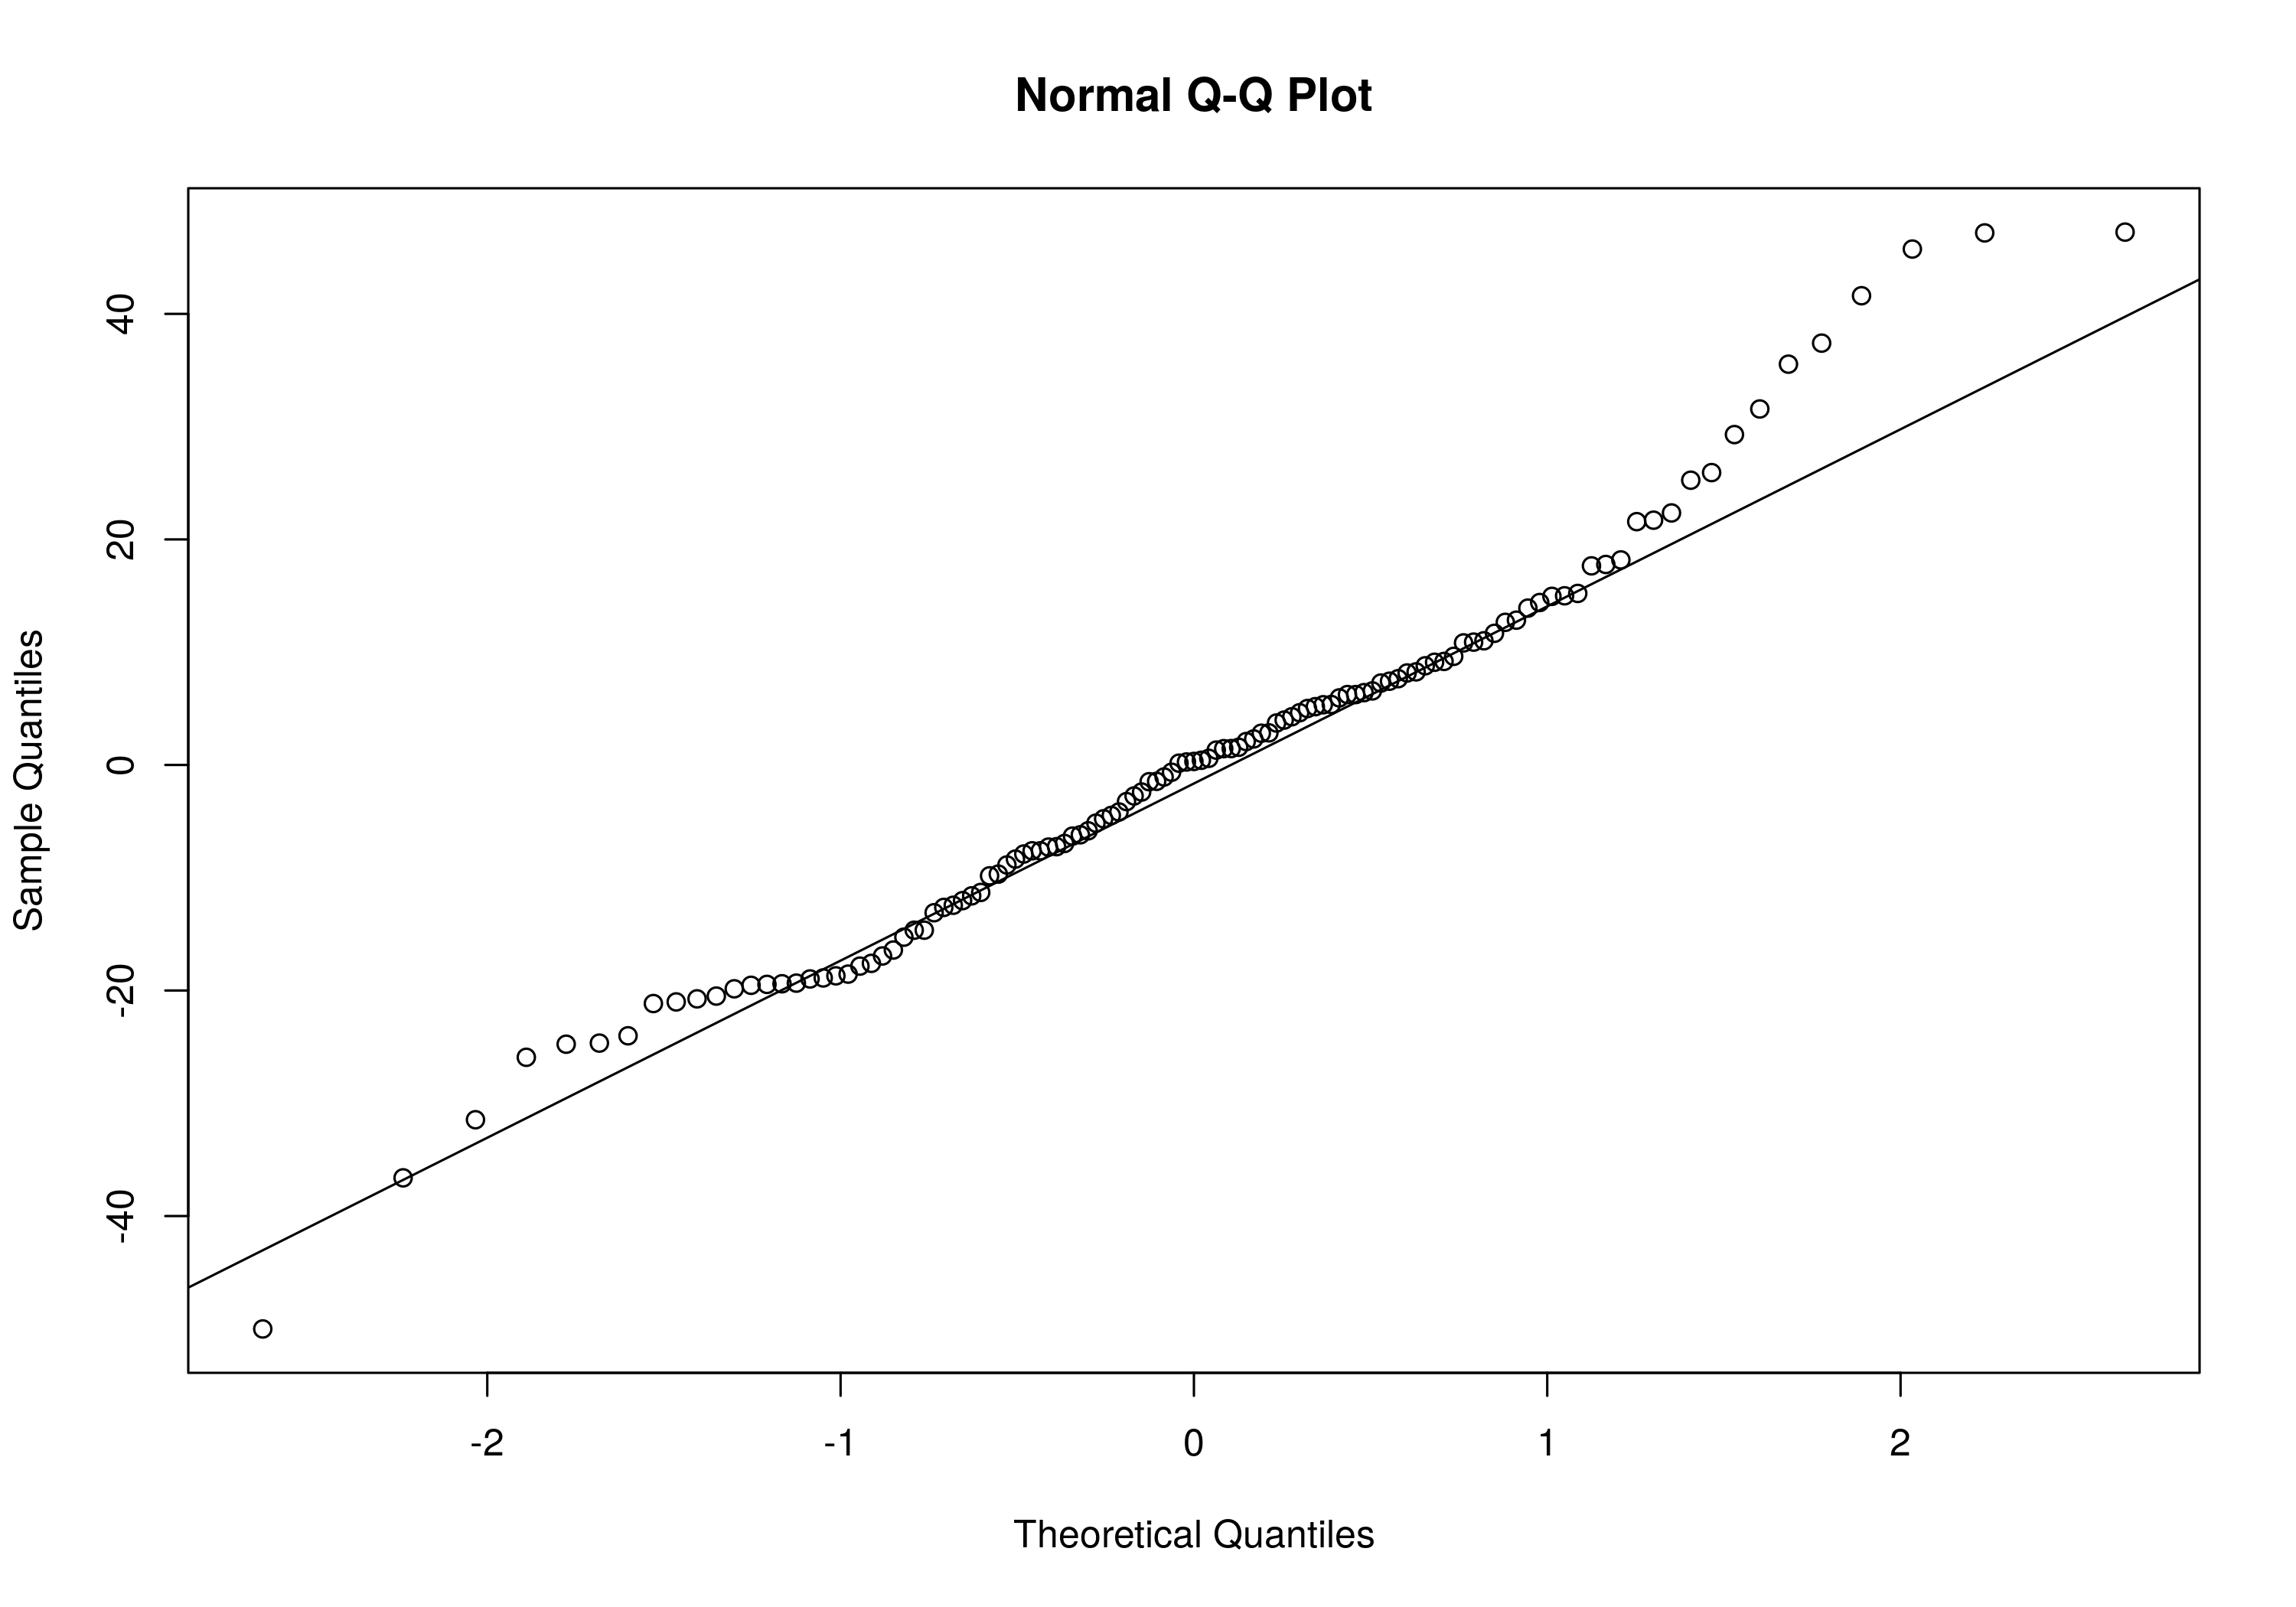

In [68]:
qqnorm(model1$residuals)
qqline(model1$residuals)

In [69]:
shapiro.test(model1$residuals)


	Shapiro-Wilk normality test

data:  model1$residuals
W = 0.97735, p-value = 0.04192


<span style="color:#5D8BF4"> Comprobamos la normalidad con test Shapiro y vemos que ésta no se satisface, puede ser debido a un dato atípico. Para ello vamos a **repetir el análisis excluyendo** la observación a la que pertenece el **residuo atípico más alejado de la cola superior**.</span>

In [70]:
which.max(model1$residuals)

4263 
 115

In [71]:
shapiro.test(model1$residuals[-c(115)])


	Shapiro-Wilk normality test

data:  model1$residuals[-c(115)]
W = 0.9826, p-value = 0.1308


<span style="color:#5D8BF4"> Quitando ese muestra comprobamos que los residuos se distribuyen de forma normal. Por lo que se podría hacer un estudio pormenorizado sobre la influencia de las observación de tipo outlier de los residuos, para determinar si el modelo es más preciso sin dicha observación. 
    
<span style="color:#5D8BF4"> Podemos mirar las **distancias de Cooks**, para ver la posibilidad de mejorar nuestro modelo tomando en cuenta o no esas observaciones extremas.
    
</span>

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id,pred_m2
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
441,7,2,3,6,450,1,0,NA,40.43186,-3.685074,120.03068,3,139.87908
4704,2,1,1,1,65,2,0,90,40.41888,-3.703460,40.04119,1,56.45107


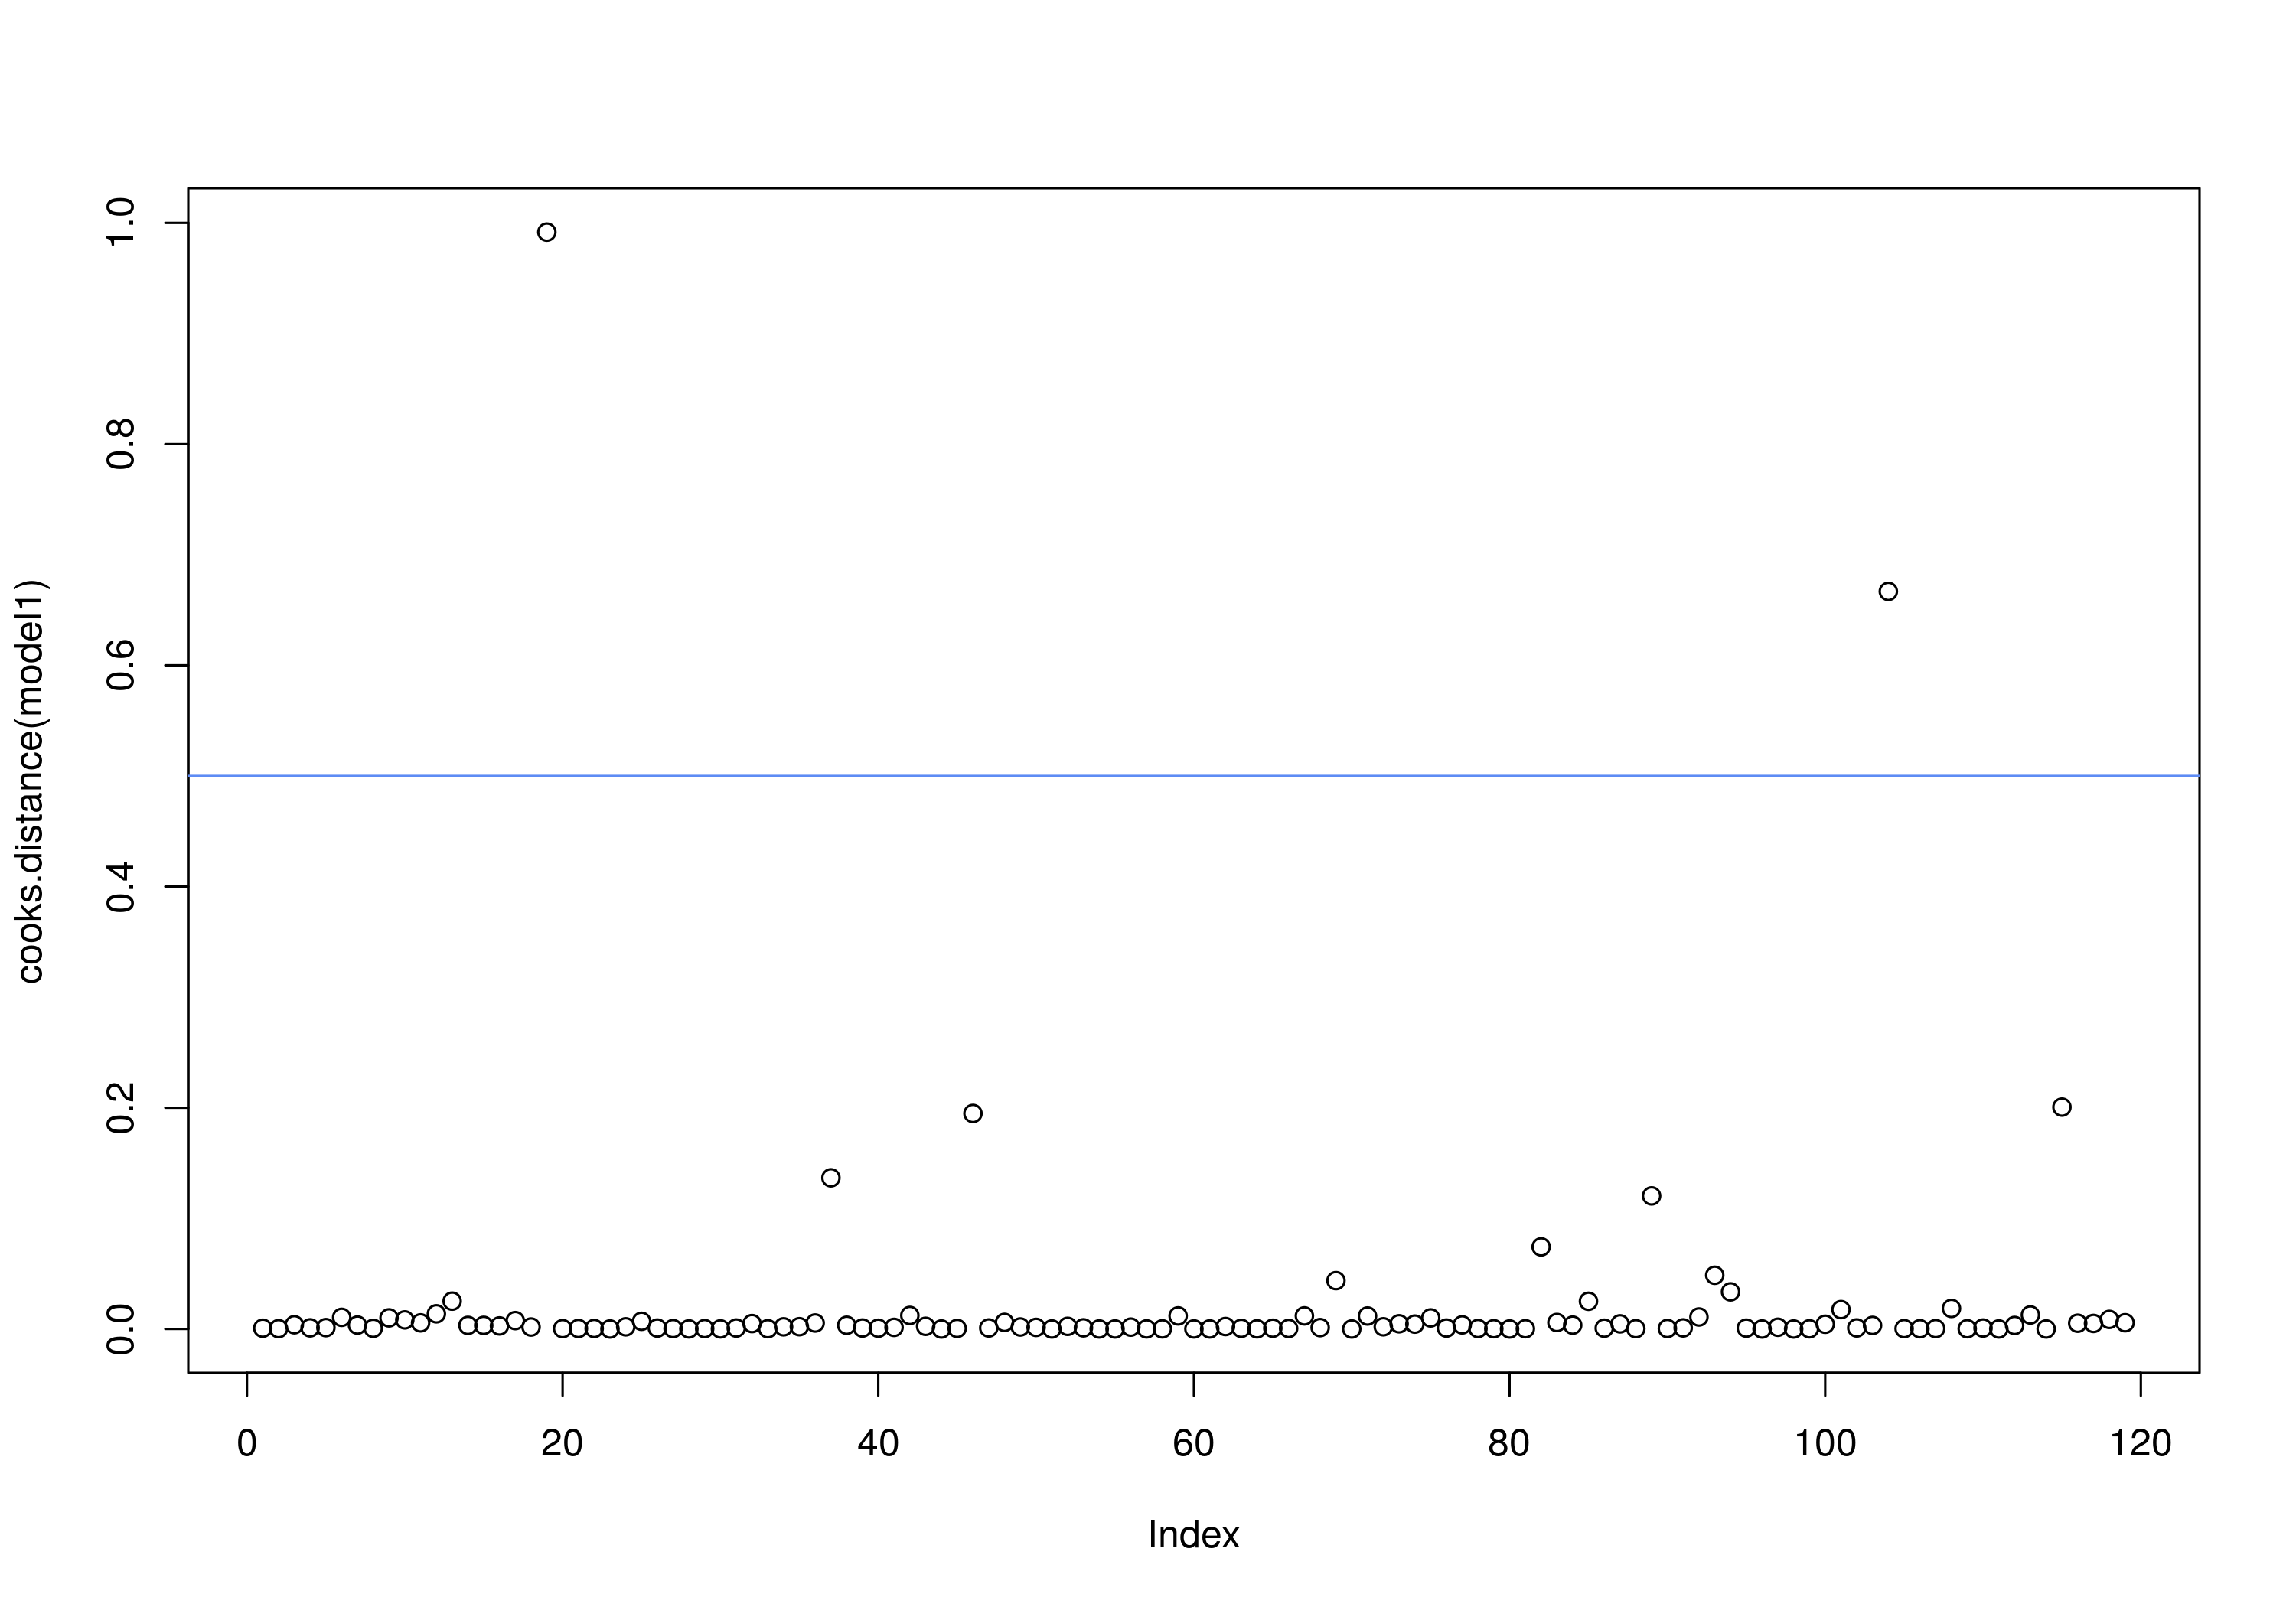

In [72]:
plot(cooks.distance(model1))
abline(h=0.5,col='#5D8BF4')
df_mad_train[cooks.distance(model1)>0.5,]

In [73]:
df_mad_train_cl <- df_mad_train[cooks.distance(model1)<0.5,]

In [74]:
model2<-lm(data=df_mad_train_cl, formula=Square.Meters~Bathrooms+Bedrooms+Price:neighb_id+Extra.People)
summary(model2)


Call:
lm(formula = Square.Meters ~ Bathrooms + Bedrooms + Price:neighb_id + 
    Extra.People, data = df_mad_train_cl)

Residuals:
    Min      1Q  Median      3Q     Max 
-49.135 -11.777  -0.027   9.138  46.864 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      21.67859    4.72625   4.587 1.20e-05 ***
Bathrooms         7.55398    4.24102   1.781 0.077645 .  
Bedrooms         14.85331    2.35805   6.299 6.33e-09 ***
Extra.People      0.27431    0.18477   1.485 0.140501    
Price:neighb_id1  0.20039    0.04060   4.936 2.86e-06 ***
Price:neighb_id2  0.01315    0.02813   0.467 0.641219    
Price:neighb_id3  0.21493    0.05844   3.678 0.000366 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.58 on 110 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.7116,	Adjusted R-squared:  0.6959 
F-statistic: 45.24 on 6 and 110 DF,  p-value: < 2.2e-16


In [75]:
df_mad_train_cl$pred_m2<- predict(model2, df_mad_train_cl)
df_mad_test$pred_m2<- predict(model2, df_mad_test)

In [76]:
print("Traning:")
caret::postResample(pred=df_mad_train_cl$pred_m2, obs=df_mad_train_cl$Square.Meters)
print("Testing:")
caret::postResample(pred=df_mad_test$pred_m2, obs=df_mad_test$Square.Meters)

[1] "Traning:"


RMSE   Rsquared        MAE 
17.0506356  0.7116255 13.2328920

[1] "Testing:"


RMSE   Rsquared        MAE 
19.6190364  0.7413902 12.7565445

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”


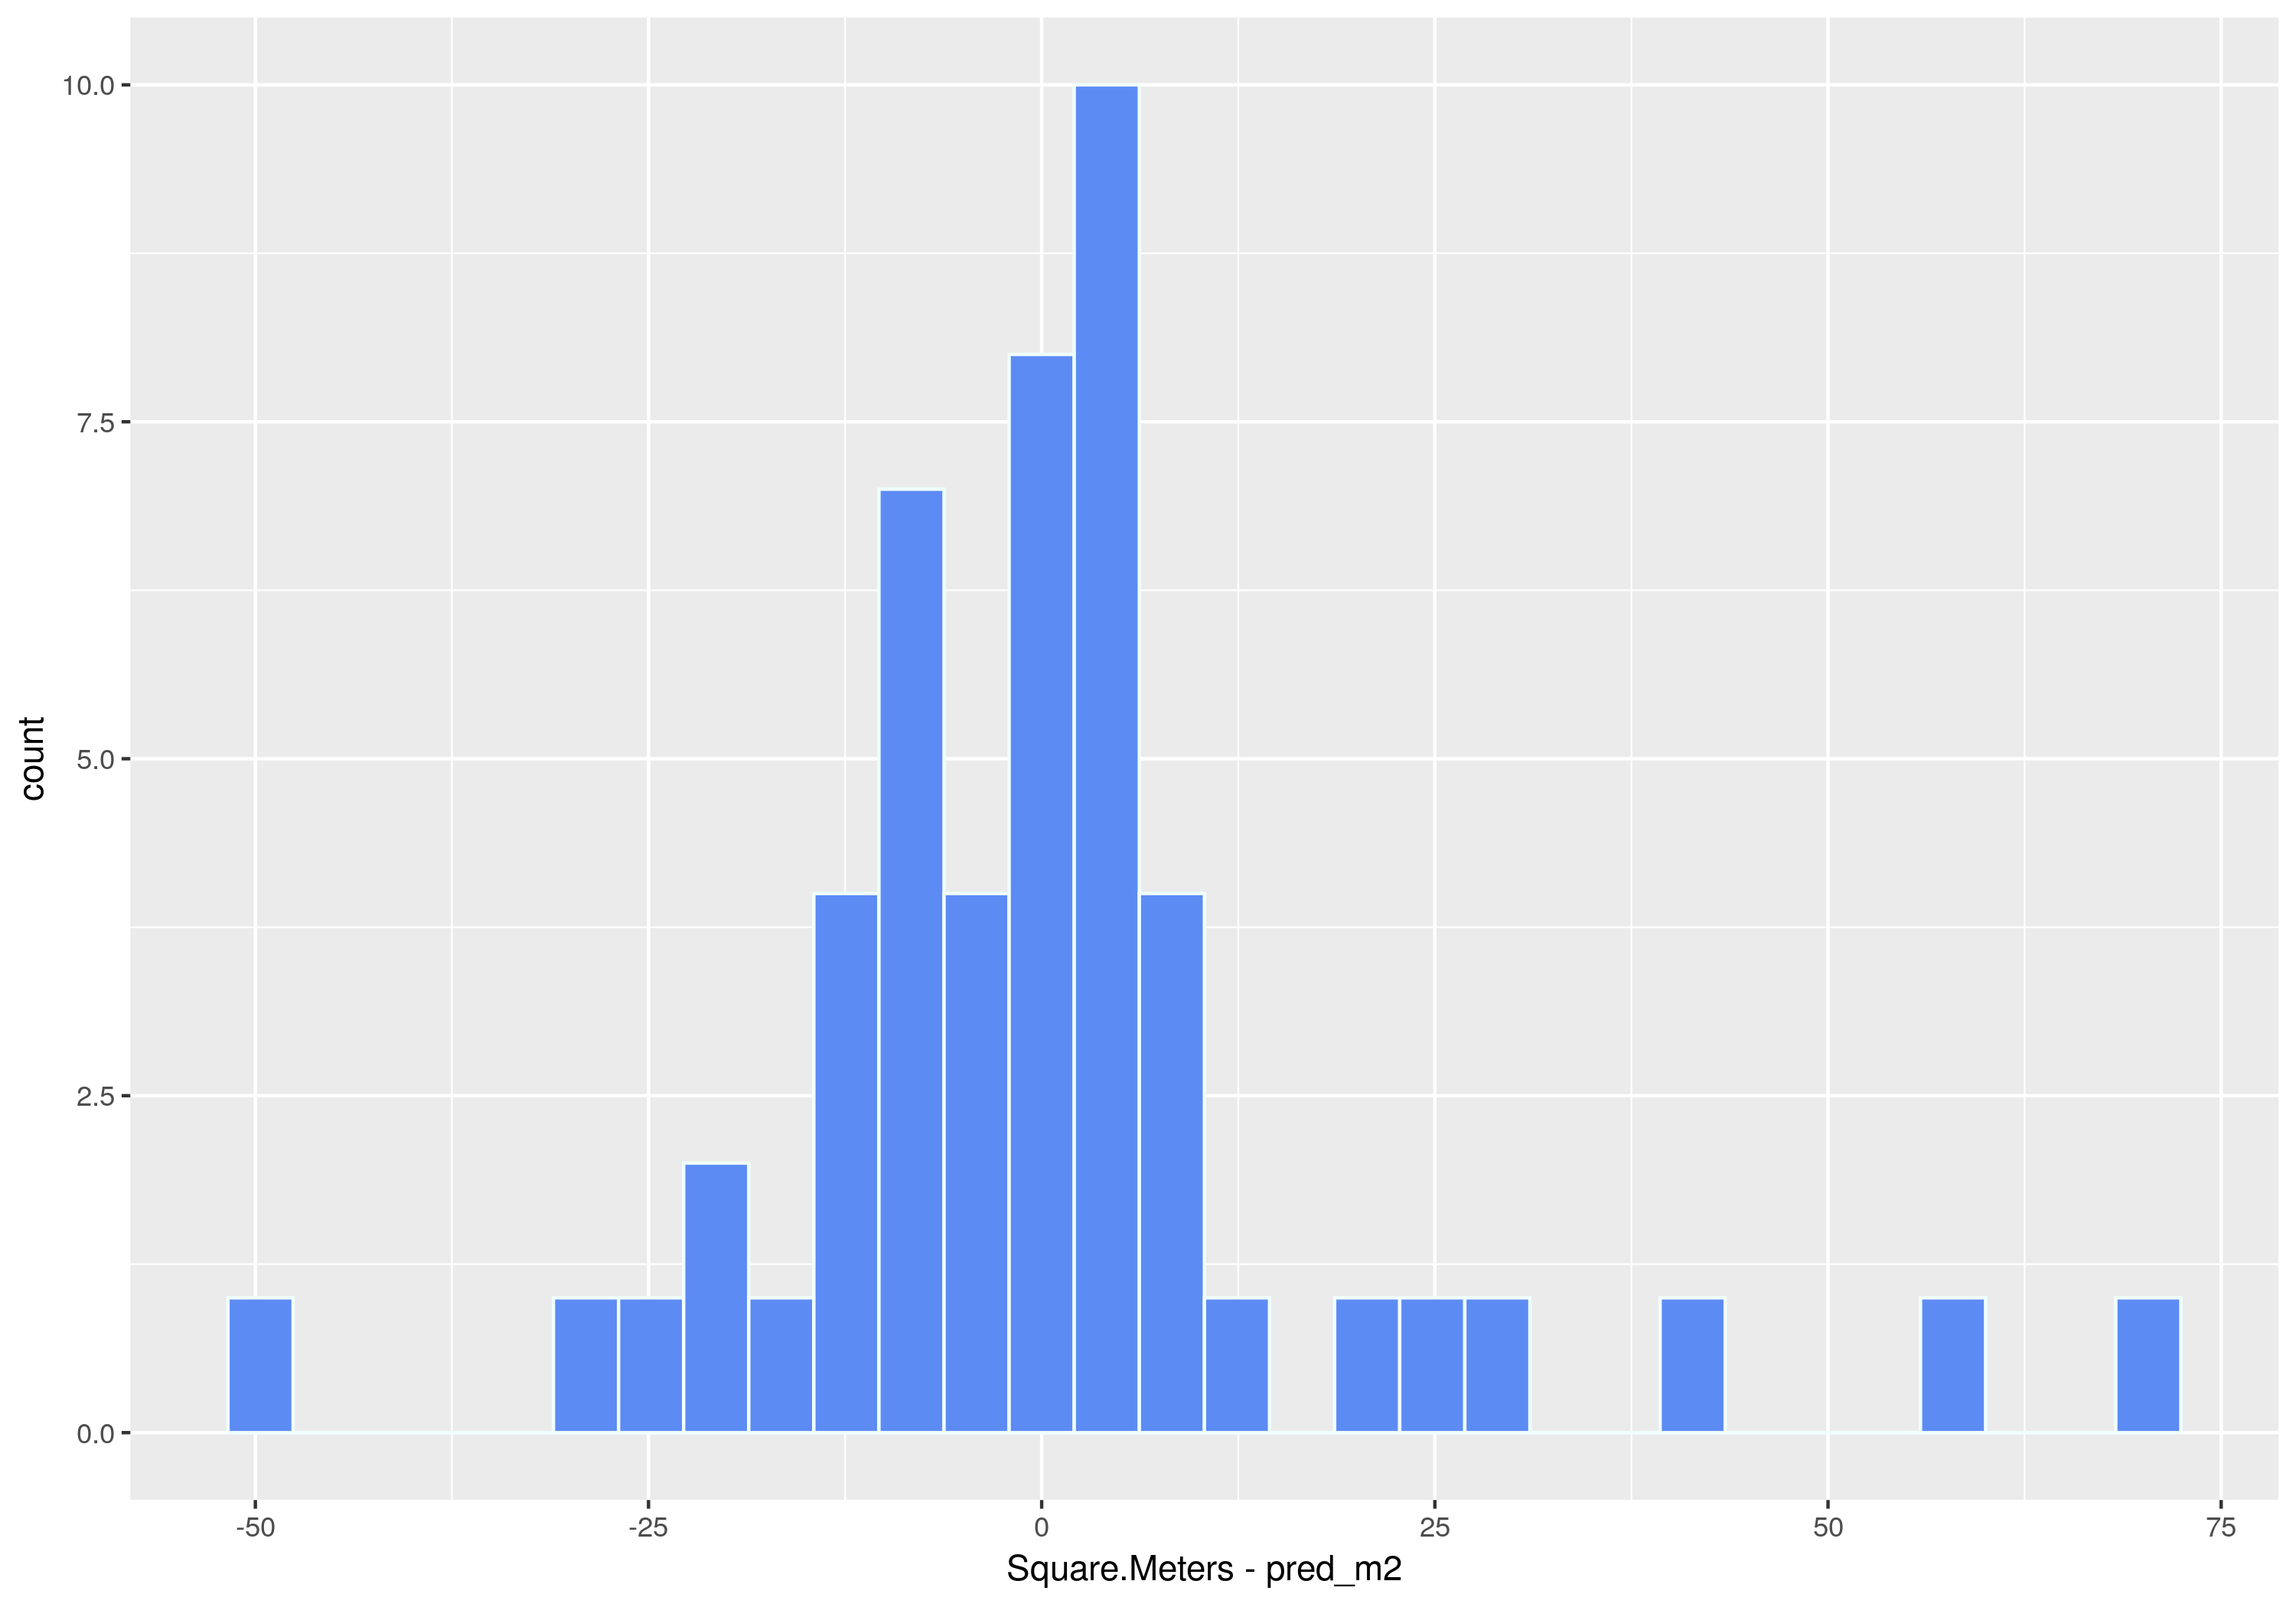

In [77]:
ggplot(df_mad_test, aes(x=Square.Meters-pred_m2))+geom_histogram(color = '#EFFFFD', fill='#5D8BF4')

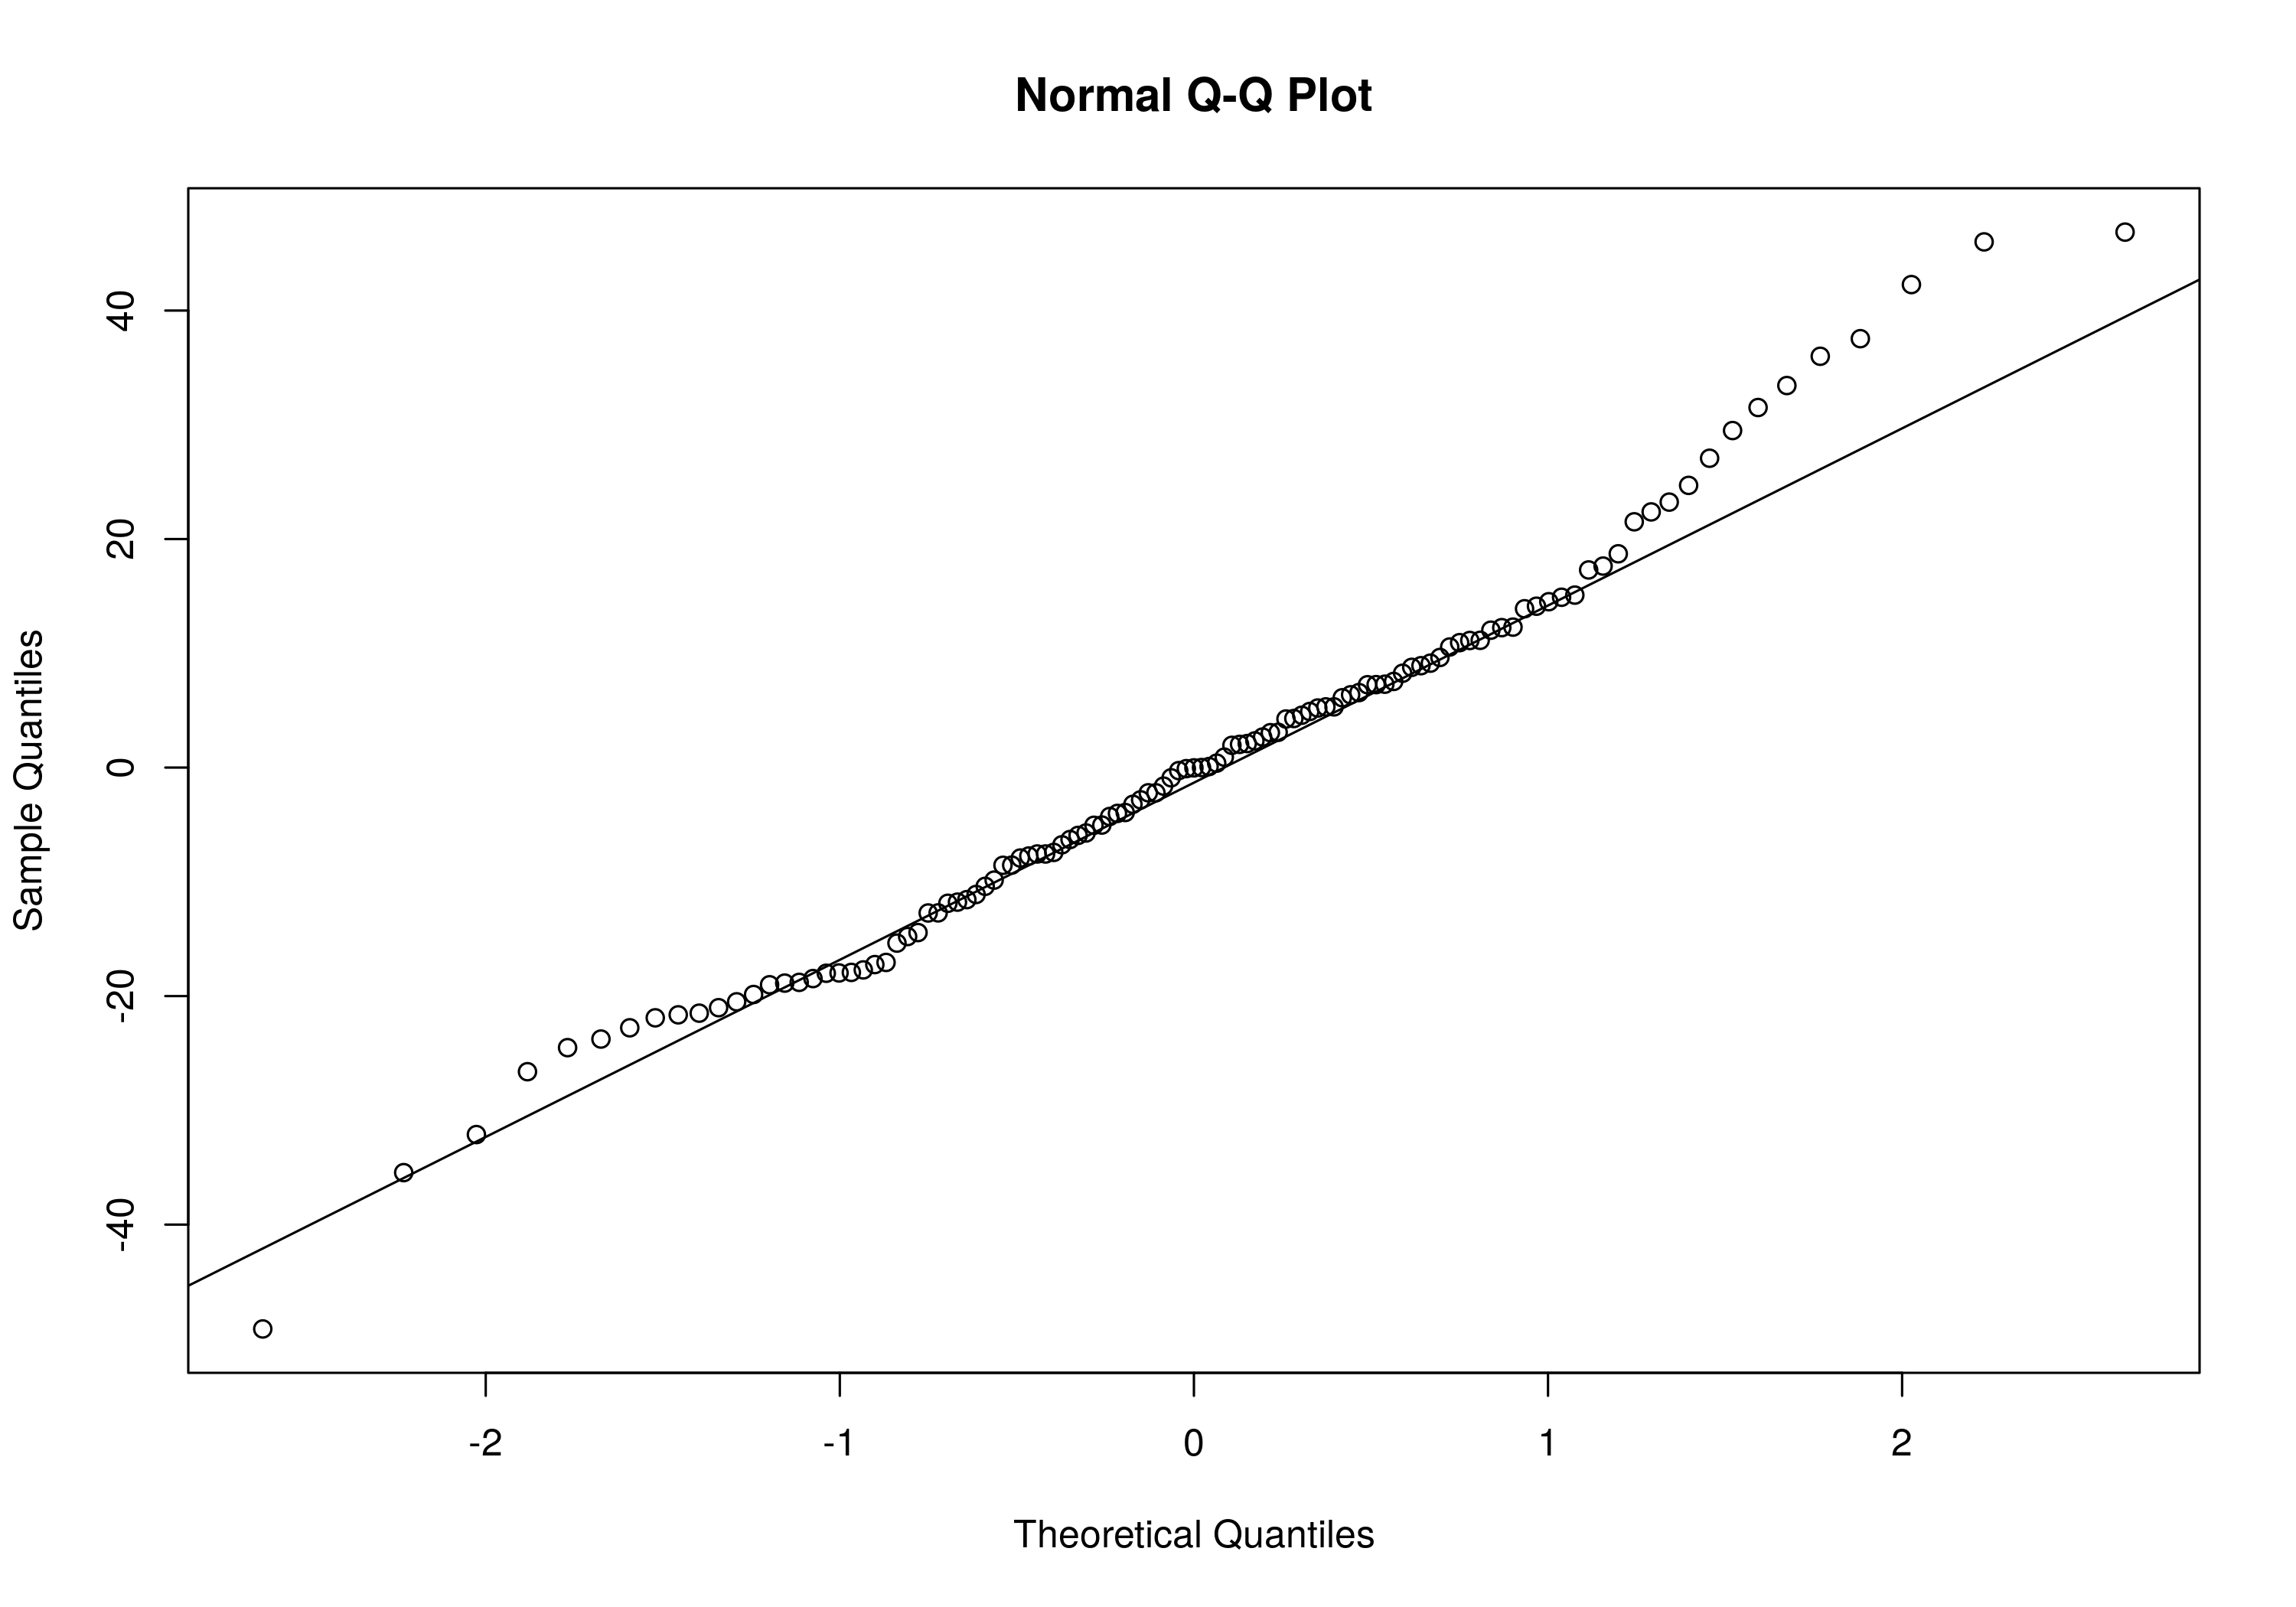

In [78]:
qqnorm(model2$residuals)
qqline(model2$residuals)

In [79]:
shapiro.test(model2$residuals)


	Shapiro-Wilk normality test

data:  model2$residuals
W = 0.98351, p-value = 0.1622


<span style="color:#5D8BF4"> El modelo, tras el estudio de las distnacias de Cooks, presenta mejoras tanto en los resultados en train como en test, mejorando las relaciones y valores de R^2 (incrementando en mabos casos), RMSE y MAE, reduciendo ambos valores así como la diferencia de valor entre train y test. Comprobamos también la distribución de residuos resultantes de aplicar **model2** y vemos que siguen una distribución normal, con un p-value > 0.05. 
    
<span style="color:#5D8BF4"> Podemos señalar que nuestro modelo es capaz de explicar entorno al 70% de la muestra.
    
<span style="color:#5D8BF4"> Decidimos usar **model2** para las sigueintes fases de este estudio. </span>

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates), con 1 baño, con un precio de 80€/noche y 3 habitaciones en el barrio de Sol, con 3 camas y un review de 80.
¿Cuantos metros cuadrados tendría? Si tu modelo necesita algúna variable adicional puedes inventartela dentro del rango de valores del dataset.
¿Como varía sus metros cuadrados con cada habitación adicional?

In [80]:
Square.Meters <- predict(model2, data.frame(Bathrooms=1, Bedrooms=3, neighb_id=as.factor(1), Price=80, Extra.People=0))
paste("Este apartamento tendría",round(Square.Meters, 2),'m2')

[1] "Este apartamento tendría 89.82 m2"

[1] "Tal y como indica summary(model2), por cada habitación adicional, los m2 aumentan: 14.85331"

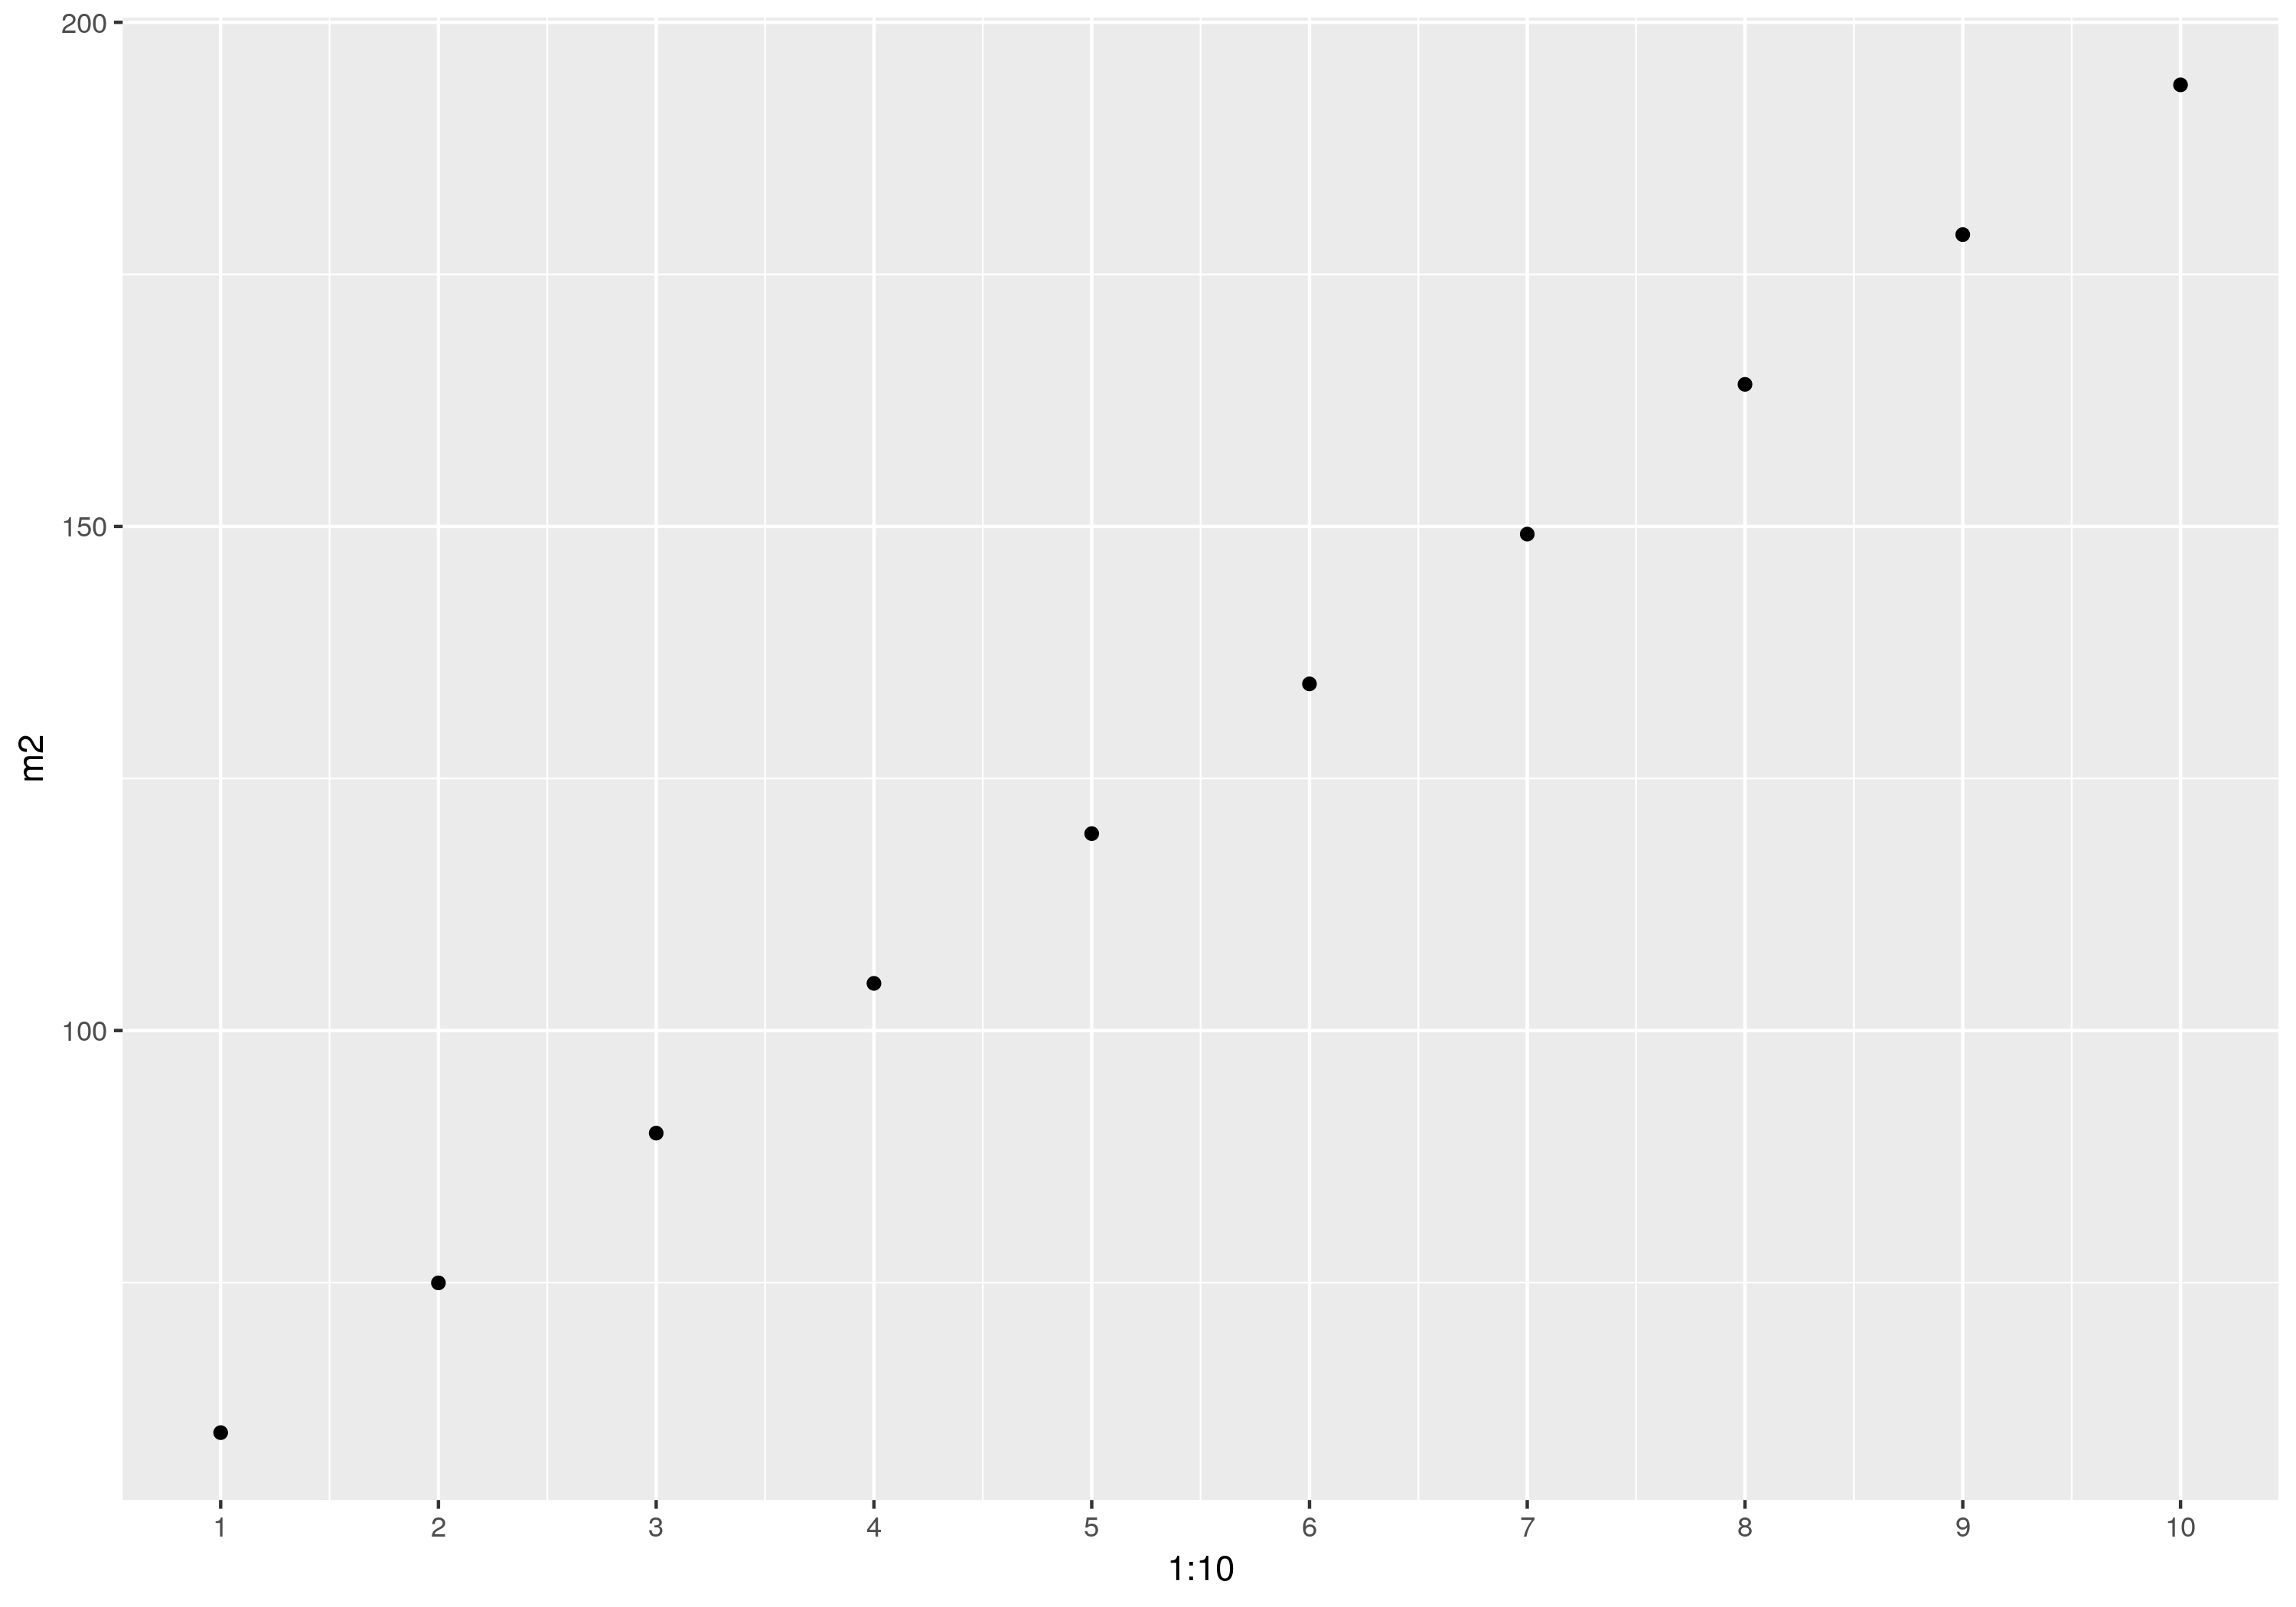

In [81]:
m2 <- c() 

for (i in 1:10){
  Square.Meters <- predict(model2, data.frame(Bathrooms=1, Bedrooms=i, neighb_id=as.factor(1), Price=80, Extra.People=0))
  m2[i] <- Square.Meters
}

paste("Tal y como indica summary(model2), por cada habitación adicional, los m2 aumentan: 14.85331")

ggplot(data.frame(m2), aes(x=1:10, y=m2))+
    geom_point()+
    #geom_hline(yintercept=m2,linetype='dashed', col='#5D8BF4')+
    scale_x_continuous(breaks=seq(0,10,by=1))

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [82]:
#head(df_madrid)

In [83]:
df_madrid[is.na(df_madrid$Square.Meters), ]$Square.Meters <- predict(model2, df_madrid[is.na(df_madrid$Square.Meters), ])

In [84]:
head(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>
1,Acacias,4,1.0,2,3,100,NA,1,0,NA,40.40540,-3.711909,78.97842,1
2,Acacias,4,2.0,2,4,90,NA,2,25,92,40.40435,-3.706820,91.38630,1
3,Acacias,4,1.0,1,2,60,538,2,15,98,40.40513,-3.707726,49.98181,1
4,Acacias,4,1.0,1,3,68,807,2,10,90,40.39691,-3.705202,74.97272,1
5,Acacias,2,0.5,0,2,30,NA,2,0,81,40.40351,-3.703586,31.46735,1
6,Acacias,4,1.0,3,3,60,NA,2,10,91,40.40563,-3.710020,88.55916,1


Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [85]:
df_mad_pca <- df_madrid %>% dplyr::select(-Neighbourhood, -Square.Feet, -neighb_id)
colnames(df_mad_pca)

[1] "Accommodates"         "Bathrooms"            "Bedrooms"            
 [4] "Beds"                 "Price"                "Guests.Included"     
 [7] "Extra.People"         "Review.Scores.Rating" "Latitude"            
[10] "Longitude"            "Square.Meters"

In [86]:
df_mad_pca <- na.omit(df_mad_pca)
dim(df_mad_pca)

[1] 4186   11

In [87]:
pr_madrid <- prcomp(df_mad_pca,center = TRUE, scale. = TRUE)

In [88]:
str(pr_madrid)

List of 5
 $ sdev    : num [1:11] 2.198 1.18 1.027 1.002 0.825 ...
 $ rotation: num [1:11, 1:11] 0.403 0.356 0.402 0.386 0.346 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:11] "Accommodates" "Bathrooms" "Bedrooms" "Beds" ...
  .. ..$ : chr [1:11] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:11] 4.12 1.24 1.42 2.38 87.1 ...
  ..- attr(*, "names")= chr [1:11] "Accommodates" "Bathrooms" "Bedrooms" "Beds" ...
 $ scale   : Named num [1:11] 1.892 0.5 0.945 1.516 54.067 ...
  ..- attr(*, "names")= chr [1:11] "Accommodates" "Bathrooms" "Bedrooms" "Beds" ...
 $ x       : num [1:4186, 1:11] 1.856 -0.815 -0.172 -2.783 0.875 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4186] "2" "3" "4" "5" ...
  .. ..$ : chr [1:11] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


In [89]:
# Matriz de autovalores
pr_madrid$sdev[1:11]
#pr_madrid$rotation[sample(1:nrow(pr_madrid$rotation),11),1:11]

[1] 2.1976301 1.1799835 1.0265604 1.0016980 0.8253458 0.7786446 0.7140282
 [8] 0.5894745 0.5711993 0.3820848 0.3221477

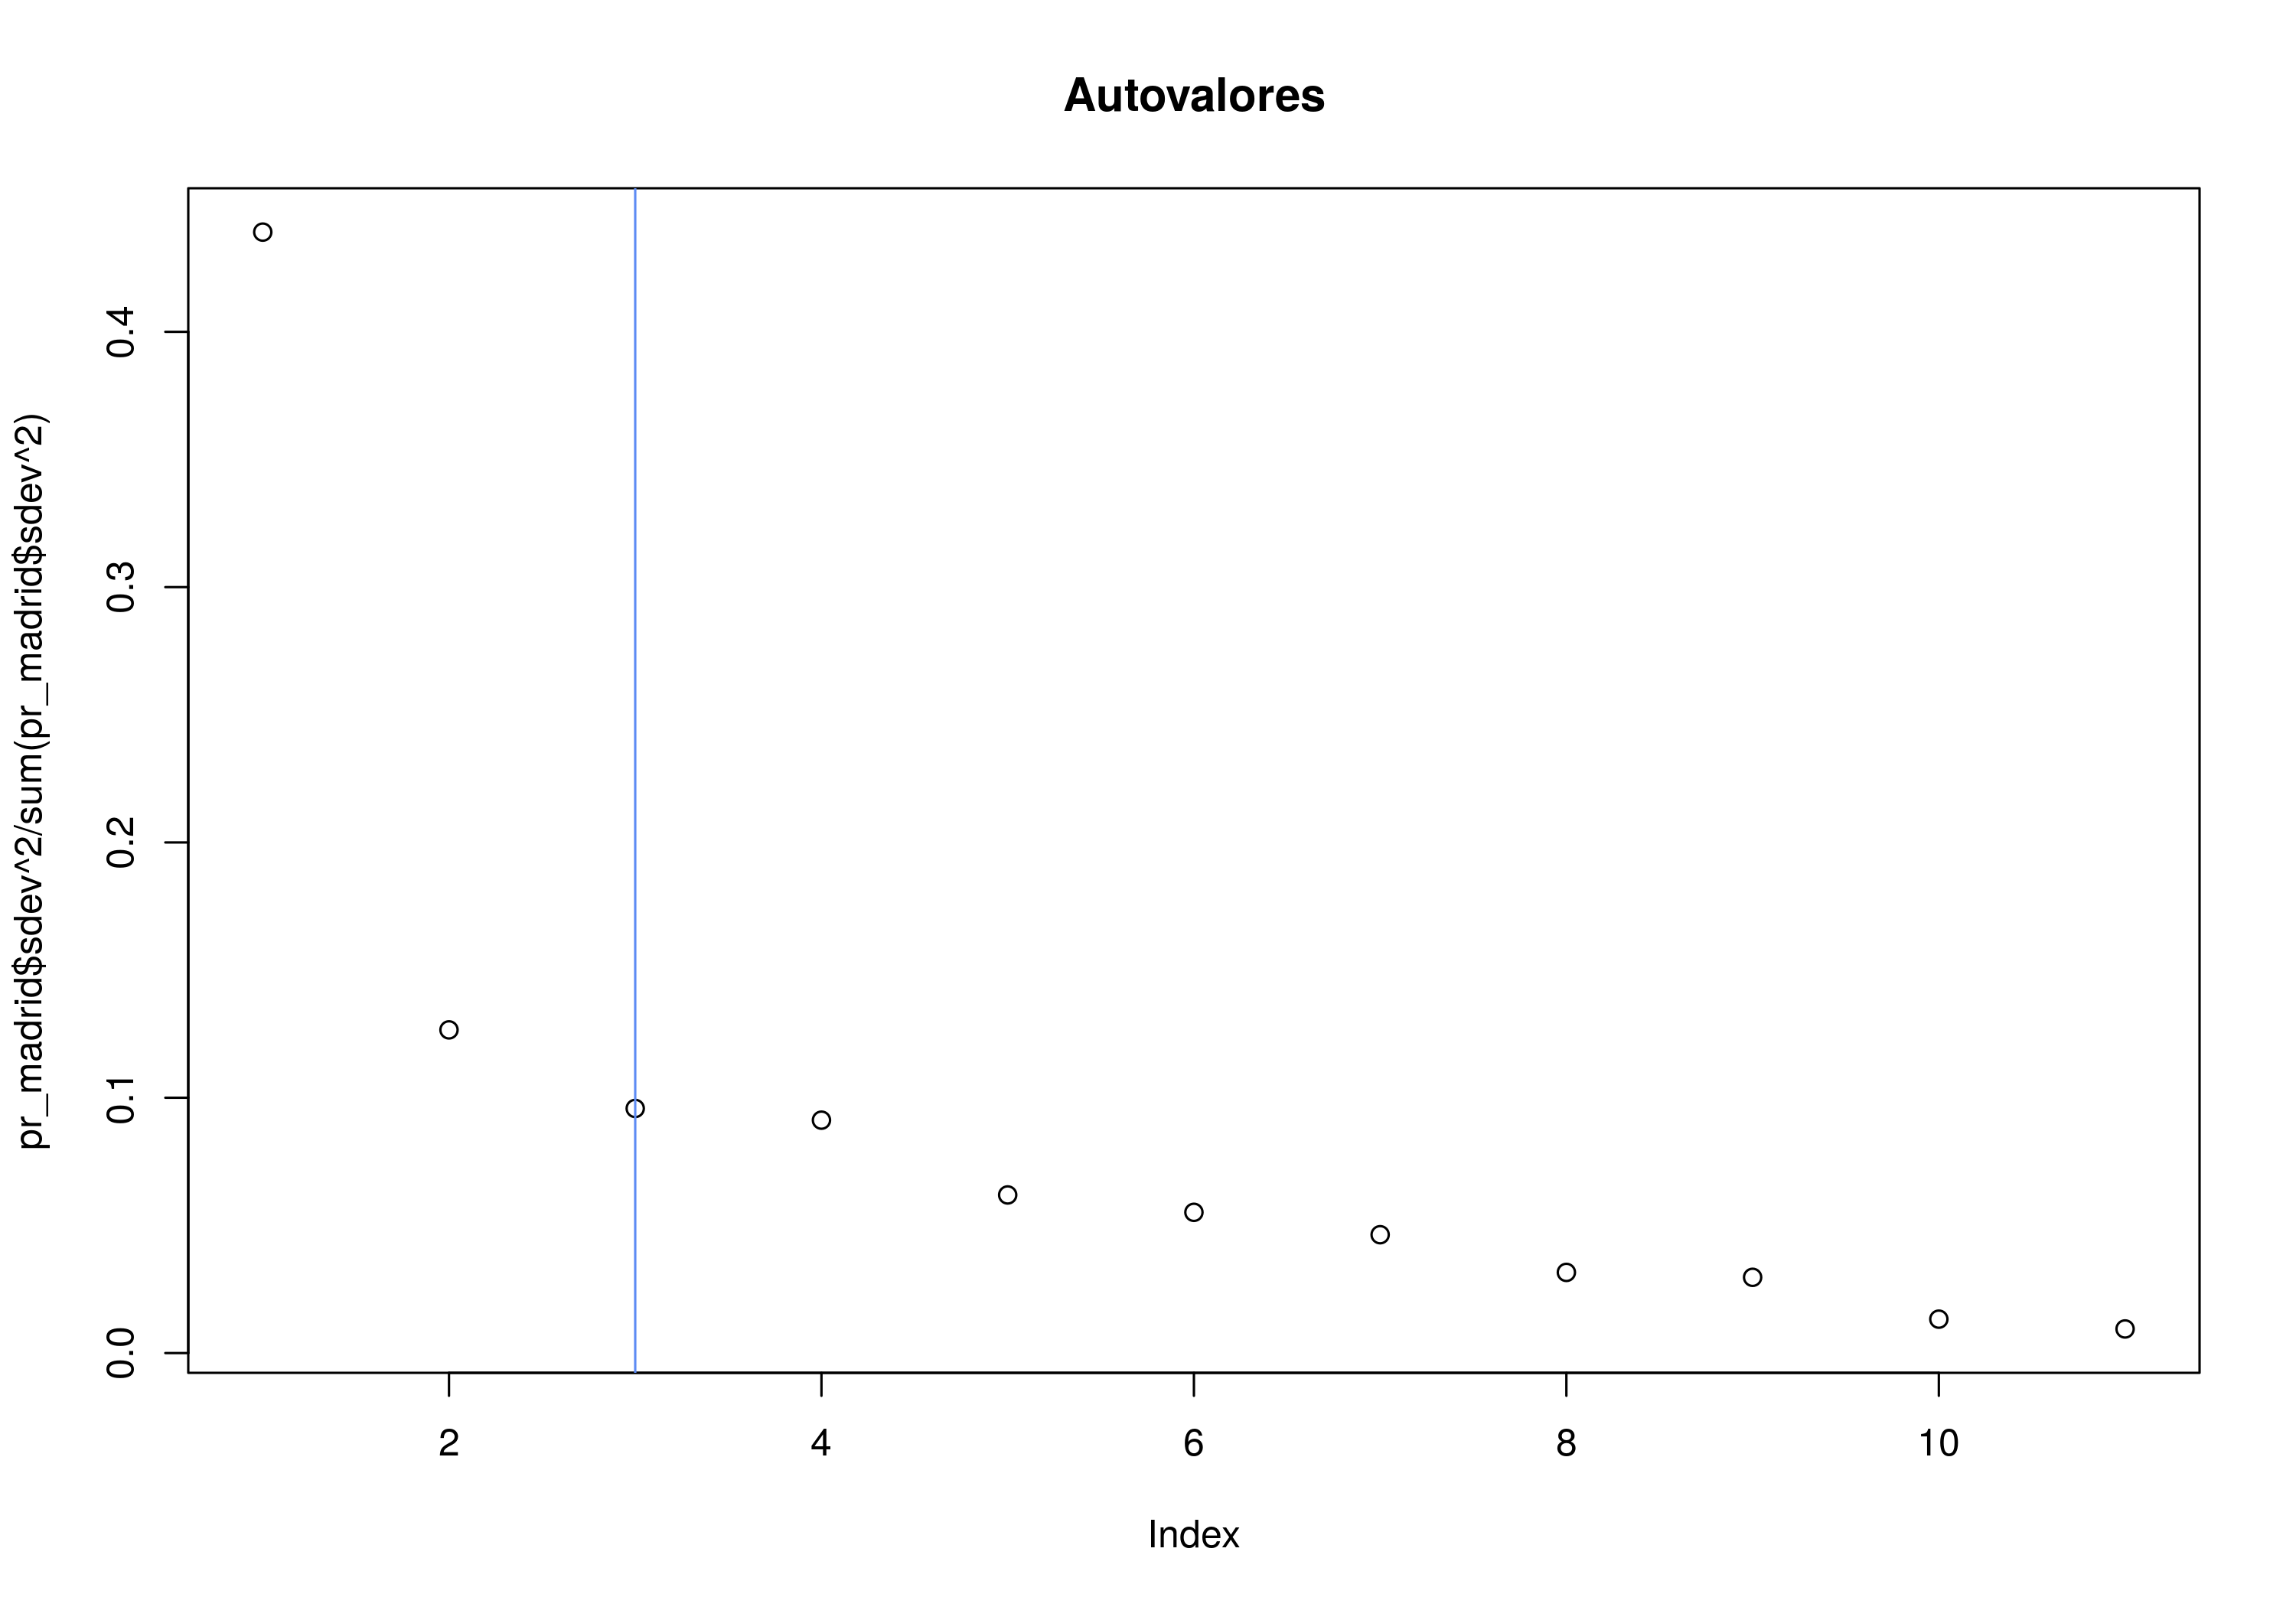

In [90]:
plot(pr_madrid$sdev^2/sum(pr_madrid$sdev^2),main="Autovalores")
abline(v = 3, col='#5D8BF4')

<span style="color:#5D8BF4"> Comprobamos que los tres primeros autovalores contienen aproximadamente el 70% de la varianza. Por lo que nos quedamos con esos tres primeros autovalores.</span>

In [91]:
apartment <- data.frame(Accommodates=6,
                        Bathrooms=1,
                        Bedrooms=3,
                        Beds=3,
                        Price=80,
                        Guests.Included=1,
                        Extra.People=0,
                        Review.Scores.Rating=80,
                        Latitude=40.1234,
                        Longitude=-3.2345,
                        Square.Meters=80
                        )

In [92]:
num_pca_components <- 3

apartment_pca <- predict(pr_madrid, newdata = apartment)
apartment_pca <- apartment_pca[1:num_pca_components]

pr_madrid_pca <- pr_madrid$x[,1:num_pca_components]

dist<-rep(NA,nrow(pr_madrid_pca))
for (i in 1:nrow(pr_madrid_pca)){
    dist[i] <- sum((apartment_pca - pr_madrid_pca[i, ])^2)
}

apartment
df_mad_pca[order(dist)[1:5], ]

Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,1,3,3,80,1,0,80,40.1234,-3.2345,80


,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
556,4,2,2,2,78,4,0,94,40.44583,-3.649906,90.02301
613,4,2,2,3,85,1,0,100,40.45263,-3.661272,83.52651
581,5,1,3,4,70,1,0,93,40.45032,-3.656943,87.81995
148,6,2,2,3,74,4,0,82,40.47194,-3.692783,81.32219
566,5,2,2,4,85,4,0,92,40.43716,-3.651870,74.97272


Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?

In [93]:
df_mad_reglog <- df_madrid %>% dplyr::select(-Neighbourhood, -Square.Feet)
df_mad_reglog <- na.omit(df_mad_reglog)

In [94]:
num_pca_components<-11
df_train_cl<-data.frame(pr_madrid$x[,1:num_pca_components])
df_train_cl$neighb_id<-df_mad_reglog$neighb_id
head(df_train_cl)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,neighb_id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,1.8556817,1.2122349,0.3070158,-0.02848201,-0.3453889,1.33825526,-0.50907515,-0.50193668,-0.90187027,0.8395088,0.24560297,1
3,-0.8150097,1.3802481,0.7214054,0.28742709,0.4218579,0.20534203,-0.09721006,0.11621403,-0.09139986,-0.1573976,0.03687678,1
4,-0.1724838,1.5283781,-0.2366126,-0.25114475,0.8069768,0.78116010,-0.14516200,0.02359972,0.13473269,0.3482697,0.88803287,1
5,-2.7827807,0.9451922,-0.6907278,-1.13879122,0.9619293,0.04265807,0.60179362,0.43127523,0.13331159,0.6268311,0.35883455,1
6,0.8746339,1.1871250,-0.4426034,-0.11963037,0.6286523,0.32000626,-1.12046506,-1.26780360,0.77679483,0.4099883,-0.09454886,1
8,-0.2144138,1.0486075,-1.0985570,0.41035365,0.6059043,0.15667791,-0.97310341,-0.39162386,0.28076881,0.2286060,0.13270643,1


In [95]:
df_train_cl_1 <- filter(df_train_cl,neighb_id %in% c(1, 2))
df_train_cl_2 <- filter(df_train_cl,neighb_id %in% c(1, 3))
df_train_cl_3 <- filter(df_train_cl,neighb_id %in% c(2, 3))

model1<-glm(df_train_cl_1,formula="neighb_id~.",family=binomial)
summary(model1)
model2<-glm(df_train_cl_2,formula="neighb_id~.",family=binomial)
summary(model2)
model3<-glm(df_train_cl_3,formula="neighb_id~.",family=binomial)
summary(model3)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = "neighb_id~.", family = binomial, data = df_train_cl_1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-6.1254  -0.0500   0.0865   0.1798   7.6956  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.28069    0.20468   6.257 3.93e-10 ***
PC1          -0.38828    0.11302  -3.436 0.000591 ***
PC2           1.55406    0.08969  17.327  < 2e-16 ***
PC3           0.37969    0.11949   3.178 0.001484 ** 
PC4          -0.07421    0.12914  -0.575 0.565512    
PC5          -0.13254    0.18583  -0.713 0.475690    
PC6          -0.85830    0.16857  -5.092 3.55e-07 ***
PC7           1.47352    0.20425   7.214 5.42e-13 ***
PC8           3.57275    0.25880  13.805  < 2e-16 ***
PC9          -0.19735    0.29469  -0.670 0.503062    
PC10         -1.48373    0.31441  -4.719 2.37e-06 ***
PC11        -16.79347    0.60552 -27.734  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter fo


Call:
glm(formula = "neighb_id~.", family = binomial, data = df_train_cl_2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0822  -0.4122  -0.3180  -0.2597   2.4172  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.42306    0.21915 -15.620  < 2e-16 ***
PC1         -0.01419    0.05704  -0.249  0.80347    
PC2         -0.60890    0.06713  -9.070  < 2e-16 ***
PC3         -0.02661    0.10144  -0.262  0.79311    
PC4         -0.04011    0.08054  -0.498  0.61852    
PC5          0.25634    0.10901   2.351  0.01870 *  
PC6          0.11752    0.10465   1.123  0.26148    
PC7         -0.13627    0.13448  -1.013  0.31089    
PC8         -0.56469    0.20077  -2.813  0.00491 ** 
PC9          0.01023    0.15993   0.064  0.94902    
PC10         0.46631    0.23689   1.968  0.04901 *  
PC11         1.22524    0.45687   2.682  0.00732 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial fa

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = "neighb_id~.", family = binomial, data = df_train_cl_3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-6.0703  -0.0655  -0.0356  -0.0132   4.0616  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.04060    0.55459  -9.089  < 2e-16 ***
PC1         -0.37054    0.21686  -1.709 0.087514 .  
PC2         -1.85200    0.16785 -11.034  < 2e-16 ***
PC3          0.05421    0.30891   0.175 0.860709    
PC4         -0.21453    0.24991  -0.858 0.390655    
PC5          0.90835    0.39888   2.277 0.022770 *  
PC6          0.02470    0.32226   0.077 0.938898    
PC7         -1.78731    0.44993  -3.972 7.12e-05 ***
PC8         -3.87045    0.58420  -6.625 3.47e-11 ***
PC9         -0.37668    0.52568  -0.717 0.473644    
PC10         2.13921    0.62990   3.396 0.000684 ***
PC11        13.23746    1.16550  11.358  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial fa

<span style="color:#5D8BF4"> De todas las coordenadas PCA la que mejor permite **clasificar por id de barrio** es **PC2**, con un Pr(>|z|) de 2e-16*** en las tres regresiones logísticas realizadas por par de cluster.</span>